In [4]:
#Import required dependencies
import pandas as pd
import csv
import matplotlib.pyplot as plt
import numpy as np
import requests
import time
from scipy import stats
from pathlib import Path
import hvplot.pandas
from pprint import pprint
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import plotly.graph_objects as go
import random
import csv
from scipy.optimize import curve_fit
import seaborn as sns


In [5]:
# Import API key
from api_keys import geoapify_key
#print(geoapify_key)

#setting graph color scheme
color = color = ['lightsteelblue', 'lightgrey', 'lightskyblue', 'royalblue', 'lightcoral', 'lightcyan', 'steelblue', 'thistle','peachpuff','turquoise']

<font size ="7"> Question 1: How has the Melbourne property market evolved over time based on the overall trends and patterns observed in the given dataset?

In [6]:

#read in CSV file
csv_file=Path("Resources/Property_Sales_Melbourne_City.csv")
mel_sales_df=pd.read_csv(csv_file)
mel_sales_df.head()

,Unnamed: 0,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,1,Abbotsford,85 Turner St,2,House,1480000,S,Biggin,3/12/2016,2.5,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,2,Abbotsford,25 Bloomburg St,2,House,1035000,S,Biggin,4/2/2016,2.5,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,4,Abbotsford,5 Charles St,3,House,1465000,SP,Biggin,4/3/2017,2.5,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,5,Abbotsford,40 Federation La,3,House,850000,PI,Biggin,4/3/2017,2.5,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,6,Abbotsford,55a Park St,4,House,1600000,VB,Nelson,4/6/2016,2.5,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


In [7]:
# Configure the map plot
map_plot_1 = mel_sales_df.hvplot.points(
    "Longtitude",
    "Lattitude",
    geo = True,
    tiles = "EsriNatGeo",
    frame_width =800,
    frame_height =700,
    color= "royalblue")

# Display the map
map_plot_1


:Overlay
   .Tiles.I  :Tiles   [x,y]
   .Points.I :Points   [Longtitude,Lattitude]

In [8]:
#clean data frame
clean_sales= mel_sales_df.dropna()
cleaned_sales= clean_sales.drop(clean_sales.columns[0], axis=1)
cleaned_sales

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
1,Abbotsford,25 Bloomburg St,2,House,1035000,S,Biggin,4/2/2016,2.5,3067.0,...,1.0,0.0,156.0,79.00,1900.0,Yarra,-37.80790,144.99340,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,House,1465000,SP,Biggin,4/3/2017,2.5,3067.0,...,2.0,0.0,134.0,150.00,1900.0,Yarra,-37.80930,144.99440,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,House,1600000,VB,Nelson,4/6/2016,2.5,3067.0,...,1.0,2.0,120.0,142.00,2014.0,Yarra,-37.80720,144.99410,Northern Metropolitan,4019.0
6,Abbotsford,124 Yarra St,3,House,1876000,S,Nelson,7/5/2016,2.5,3067.0,...,2.0,0.0,245.0,210.00,1910.0,Yarra,-37.80240,144.99930,Northern Metropolitan,4019.0
7,Abbotsford,98 Charles St,2,House,1636000,S,Nelson,8/10/2016,2.5,3067.0,...,1.0,2.0,256.0,107.00,1890.0,Yarra,-37.80600,144.99540,Northern Metropolitan,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15388,Whittlesea,30 Sherwin St,3,House,601000,S,Ray,29/7/2017,35.5,3757.0,...,2.0,1.0,972.0,149.00,1996.0,Whittlesea,-37.51232,145.13282,Northern Victoria,2170.0
15389,Williamstown,75 Cecil St,3,House,1050000,VB,Williams,29/7/2017,6.8,3016.0,...,1.0,0.0,179.0,115.00,1890.0,Hobsons Bay,-37.86558,144.90474,Western Metropolitan,6380.0
15390,Williamstown,2/29 Dover Rd,1,Unit,385000,SP,Williams,29/7/2017,6.8,3016.0,...,1.0,1.0,0.0,35.64,1967.0,Hobsons Bay,-37.85588,144.89936,Western Metropolitan,6380.0
15392,Windsor,201/152 Peel St,2,Unit,560000,PI,hockingstuart,29/7/2017,4.6,3181.0,...,1.0,1.0,0.0,61.60,2012.0,Stonnington,-37.85581,144.99025,Southern Metropolitan,4380.0


In [9]:
# Configure the map plot
map_plot_2 = cleaned_sales.hvplot.points(
    "Longtitude",
    "Lattitude",
    geo = True,
    tiles = "EsriNatGeo",
    frame_width =800,
    frame_height =700,
    color= "royalblue")

# Display the map
map_plot_2

:Overlay
   .Tiles.I  :Tiles   [x,y]
   .Points.I :Points   [Longtitude,Lattitude]

In [10]:
#Calculate the total sales for data frame
total_sales = cleaned_sales['Price'].sum()
print(f"Total Sales for all listed Melbourne Property across January 2016 to September 2017 is equal to ${total_sales:,.2f}")

print(f"-----------------------------------------------------------------------------------------------------------------------")
#Calculate the average sales
av_sales = cleaned_sales['Price'].mean()
print(f"Total average sales for all listed Melbourne Property across January 2016 to September 2017 is equal to ${av_sales:,.2f}")

Total Sales for all listed Melbourne Property across January 2016 to September 2017 is equal to $6,622,459,540.00
-----------------------------------------------------------------------------------------------------------------------
Total average sales for all listed Melbourne Property across January 2016 to September 2017 is equal to $1,068,828.20


House        4088
Unit         1506
Townhouse     602
Name: Type, dtype: int64


Text(0.5, 1.0, 'Breakdown of the Count of Properties by Type')

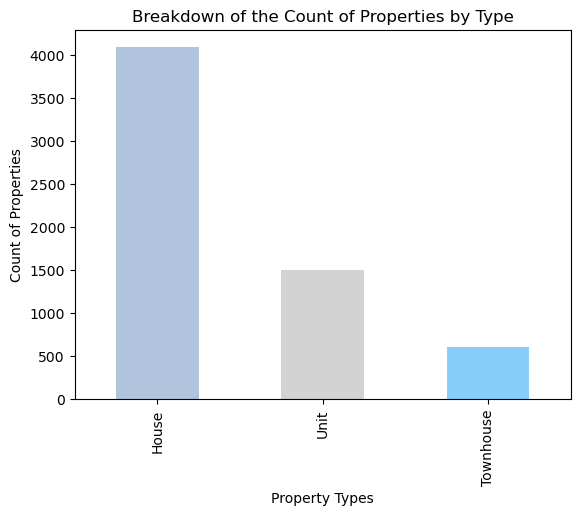

In [11]:
# see number of houses, units and townhouses
type_count=cleaned_sales['Type'].value_counts()
print(type_count.head())
type_count.plot.bar(x='type', color = color)
plt.xlabel("Property Types")
plt.ylabel("Count of Properties")
plt.title("Breakdown of the Count of Properties by Type")

Type
House        $1,273,016
Townhouse      $884,182
Unit           $588,375
Name: Price, dtype: object


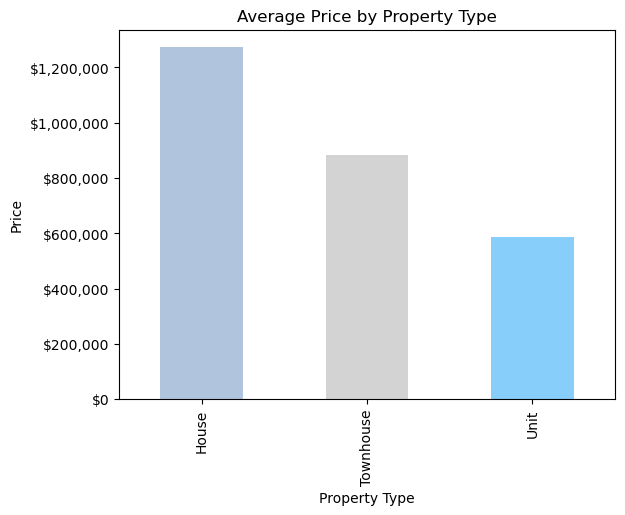

In [12]:
#Average sales by property type 
av_price_by_type = cleaned_sales.groupby('Type')['Price'].mean()
av_price_by_type = av_price_by_type.apply(lambda x: '${:,.0f}'.format(x))
print(av_price_by_type)

# group the dataframe by 'type' and calculate the mean 'Price' for each group
av_price_by_type = cleaned_sales.groupby('Type')['Price'].mean()


# create a bar chart
ax = av_price_by_type.plot.bar(color = color)

# Format the y-axis ticks to display values in dollars
fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax.yaxis.set_major_formatter(tick)

# add a title and axis labels
plt.title('Average Price by Property Type')
plt.xlabel('Property Type')
plt.ylabel('Price')


# display the chart
plt.show()

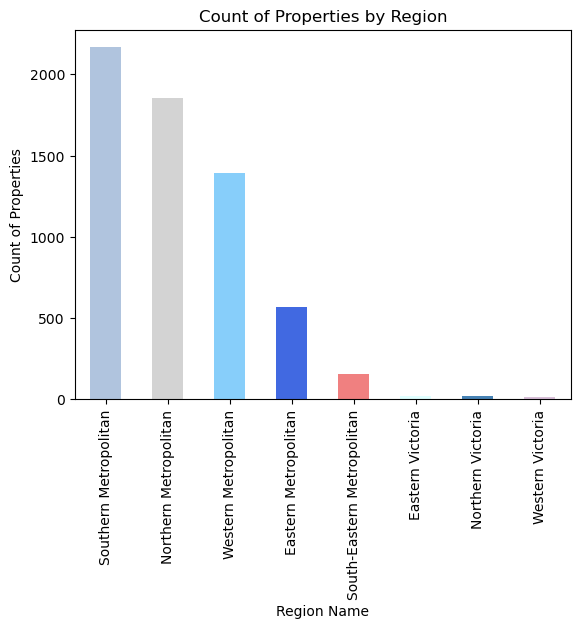

In [13]:
#sales by region 
region_sales = cleaned_sales['Regionname'].value_counts()
region_sales
x=['Regionname']
y= cleaned_sales['Regionname'].value_counts()
region_sales.plot.bar(x,y,color=color)
plt.xlabel("Region Name")
plt.ylabel("Count of Properties")
plt.title("Count of Properties by Region")
plt.show()

In [14]:
#Average Size by Property Type
av_size = cleaned_sales.groupby('Type')['Landsize'].mean()
av_size

Type
House        513.565802
Townhouse    259.611296
Unit         439.984064
Name: Landsize, dtype: float64

/var/folders/c6/f4lv068572x0t6lvnvn2yjyc0000gn/T/ipykernel_62560/3395720668.py:13: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_av_size_region['Average Price'] = df_av_size_region['Average Price'].str.replace('$','').str.replace(',','').astype(float)


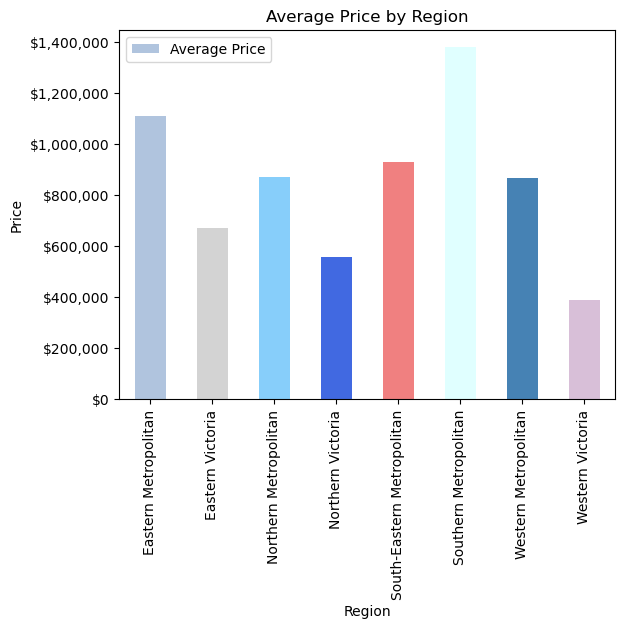

In [ ]:
#Calcaulte average price by Region
av_size_region = cleaned_sales.groupby('Regionname')['Price'].mean()
av_size_region = av_size_region.apply(lambda x: '${:,.0f}'.format(x))
av_size_region

# convert the index and values of the series object to a dataframe
df_av_size_region = av_size_region.reset_index()

# rename the columns to 'Regionname' and 'Average Price'
df_av_size_region.columns = ['Regionname', 'Average Price']

# convert the 'Average Price' column to a float data type
df_av_size_region['Average Price'] = df_av_size_region['Average Price'].str.replace('$','').str.replace(',','').astype(float)

# create a bar chart
ax = df_av_size_region.plot.bar(x='Regionname', y='Average Price', color = color)

# Format the y-axis ticks to display values in dollars
fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax.yaxis.set_major_formatter(tick)

# add a title and axis labels
plt.title('Average Price by Region')
plt.xlabel('Region')
plt.ylabel('Price')

# display the chart
plt.show()

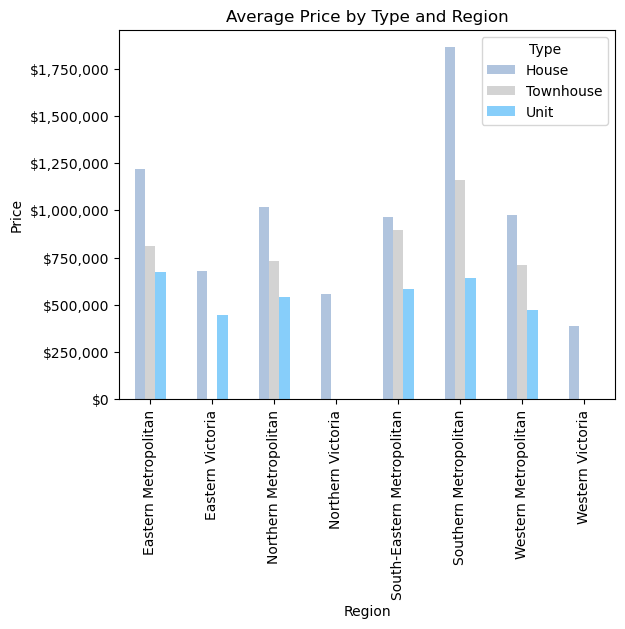

In [15]:
# use pivot_table() method to create a new dataframe with the average price of each property type for each region
df_av_price_by_type_region = cleaned_sales.pivot_table(index='Regionname', columns='Type', values='Price', aggfunc='mean')

# create a bar chart
ax = df_av_price_by_type_region.plot.bar(color = color)

# Format the y-axis ticks to display values in dollars
fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax.yaxis.set_major_formatter(tick)

# add a title and axis labels
plt.title('Average Price by Type and Region')
plt.xlabel('Region')
plt.ylabel('Price')

# display the chart
plt.show()

In [16]:
#Create a function that determines seasons function based on months function

# Define a function that maps each month to a season
def get_season(month):
    if month in ['Dec', 'Jan', 'Feb']:
        return 'Winter'
    elif month in ['Mar', 'Apr', 'May']:
        return 'Spring'
    elif month in ['Jun', 'Jul', 'Aug']:
        return 'Summer'
    else:
        return 'Autumn'

In [17]:
#Get the date column converted, so we can get month and year separated
# Convert the Date column to a Pandas datetime format
property_database = mel_sales_df
property_database['Date'] = pd.to_datetime(property_database['Date'], format='%d/%m/%Y')
# Create a new column for Month_Year
property_database['Month_Year'] = property_database['Date'].dt.strftime('%b-%Y')
# Group the data by Month_Year and calculate the mean price and count of sales for each group
price_by_month_year = property_database.groupby('Month_Year').agg({'Price': 'mean', 'Date': 'count'}).reset_index()
# Rename the 'Date' column to 'Sales'
price_by_month_year = price_by_month_year.rename(columns={'Date': 'Count of Sales'})
# Add a new column for season based on the Month_Year column
price_by_month_year['Season'] = price_by_month_year['Month_Year'].apply(lambda x: get_season(x[:3]))
# Convert the Month_Year column to a Pandas datetime format
price_by_month_year['Month_Year'] = pd.to_datetime(price_by_month_year['Month_Year'], format='%b-%Y')
# Sort the DataFrame by Month_Year
price_by_month_year = price_by_month_year.sort_values('Month_Year').reset_index()
# Convert the Month_Year column back to a string
price_by_month_year['Month_Year'] = price_by_month_year['Month_Year'].dt.strftime('%b-%Y')
# Select only the Month_Year, Price, Sales, and Season columns
price_by_month_year = price_by_month_year[["Month_Year","Price", "Count of Sales", "Season"]]
# Display the resulting DataFrame
price_by_month_year.head()


,Month_Year,Price,Count of Sales,Season
0,Jan-2016,1.009000e+06,2,Winter
1,Feb-2016,9.008214e+05,35,Winter
2,Apr-2016,1.006784e+06,401,Spring
3,May-2016,1.047057e+06,1167,Spring
4,Jun-2016,1.038088e+06,962,Summer


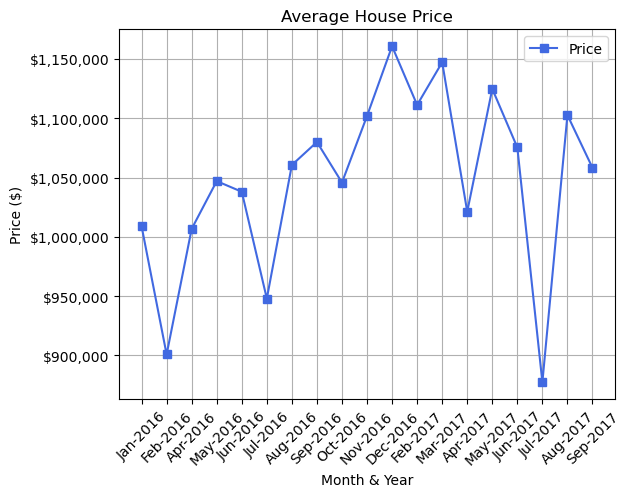

In [18]:
# Get the unique values in the "Month_Year" column
x_labels = price_by_month_year["Month_Year"].unique()

# Plot a line plot of the dataframe
ax = price_by_month_year.plot(kind="line", x="Month_Year", y="Price", marker="s", color="royalblue")

# Set the x-axis labels to be the unique values in the "Month_Year" column
ax.set_xticks(range(len(x_labels)))
ax.set_xticklabels(x_labels, rotation=45)

# Format the y-axis ticks to display values in dollars
fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax.yaxis.set_major_formatter(tick)

plt.ylabel("Price ($)")
plt.xlabel("Month & Year")
plt.title("Average House Price")
plt.grid()

# Save the figure
plt.savefig("Output Data/Graph Images/AverageHousePricevsPeriod")

# Display the plot
plt.show()

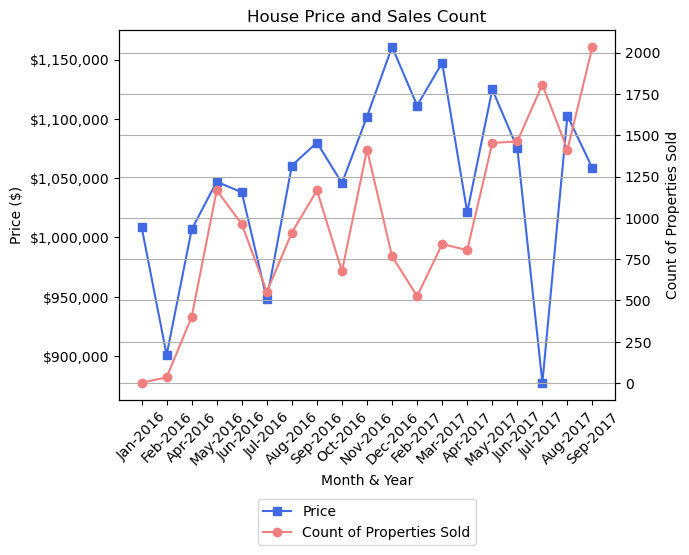

In [19]:
# Create a figure and axis objects
fig, ax1 = plt.subplots()

# Add a second axis
ax2 = ax1.twinx()

# Set x-axis label
ax1.set_xlabel("Month & Year")

# Set the x-axis labels to be the unique values in the "Month_Year" column
ax1.set_xticks(range(len(x_labels)))
ax1.set_xticklabels(x_labels, rotation=45)

# Set y-axis labels
ax1.set_ylabel("Price ($)")
ax2.set_ylabel("Count of Properties Sold")

# Format the y-axis ticks to display values in dollars
fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax1.yaxis.set_major_formatter(tick)

# Plot the data on each axis and add legends
p1 = ax1.plot(price_by_month_year["Month_Year"], price_by_month_year["Price"], color="royalblue",marker="s", label="Price")
p2 = ax2.plot(price_by_month_year["Month_Year"], price_by_month_year["Count of Sales"], color="lightcoral",marker="o", label="Count of Properties Sold")

# Combine the legends and place it below the graph title
lines = p1 + p2
labels = [l.get_label() for l in lines]
plt.legend(lines, labels, loc='upper center', bbox_to_anchor=(0.5, -0.25))

# Set the title
plt.title("House Price and Sales Count")

#Add features to the plot
plt.grid()

# Save the figure
plt.savefig("Output Data/Graph Images/AverageHousePricevsPeriod(IncludingCountofSales)")

# Show the plot
plt.show()

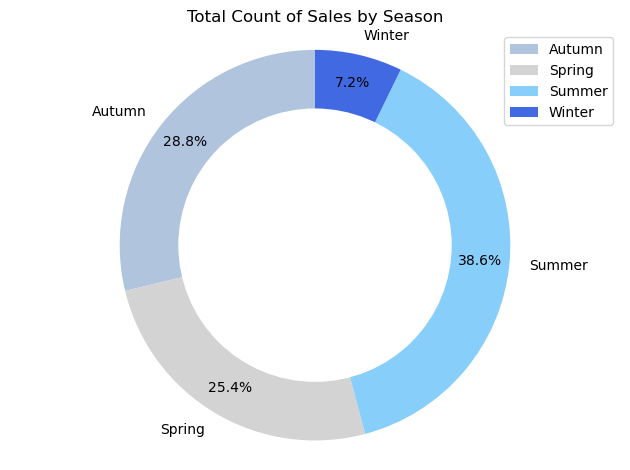

In [20]:
# Group the data by season and sum the sales for each group
sales_by_season = price_by_month_year.groupby('Season')['Count of Sales'].sum()

# Create a donut chart of the sales by season
plt.pie(sales_by_season, labels=sales_by_season.index, colors=color, autopct='%1.1f%%', startangle=90, pctdistance=0.85, labeldistance=1.1, wedgeprops={'width': 0.5})
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Add a title and legend to the chart
plt.title('Total Count of Sales by Season')
plt.legend(labels=sales_by_season.index, loc='upper right')

# Display the chart
plt.axis('equal')
plt.tight_layout()

# Save the figure
plt.savefig("Output Data/Graph Images/SalesbySeasons")

#Show the plot
plt.show()


In [21]:
# Load the CSV file for interest rate infomation into a Pandas DataFrame
csv_file = Path("Resources/Interest _Rate_Monthly_Avg.csv")
interest_rate_database = pd.read_csv(csv_file)

#Correct column headings 
interest_rate_df = interest_rate_database.rename(columns={'Date*': 'Date',"Owner Occupier Standard Variable Rate":"Avg_Standard_Rate"})

# Convert 'Date' column to pandas datetime object
interest_rate_df['Date'] = pd.to_datetime(interest_rate_df['Date'], format='%d-%b-%y')

# Extract Month_Year as separate column
interest_rate_df['Month_Year'] = interest_rate_df['Date'].dt.strftime('%b-%Y')

#Rearrange the columns
interest_rate_df = interest_rate_df[["Month_Year","Avg_Standard_Rate","RBA Cash Rate"]]

# Display resulting dataframe
interest_rate_df.head()

#Merge interest_rate_df to the price_by_month_year for regression analysis
price_interest_rate_df = price_by_month_year.merge(interest_rate_df, on='Month_Year')
price_interest_rate_df.head()

,Month_Year,Price,Count of Sales,Season,Avg_Standard_Rate,RBA Cash Rate
0,Jan-2016,1.009000e+06,2,Winter,5.46,2.00
1,Feb-2016,9.008214e+05,35,Winter,5.46,2.00
2,Apr-2016,1.006784e+06,401,Spring,5.46,2.00
3,May-2016,1.047057e+06,1167,Spring,5.39,1.75
4,Jun-2016,1.038088e+06,962,Summer,5.39,1.75


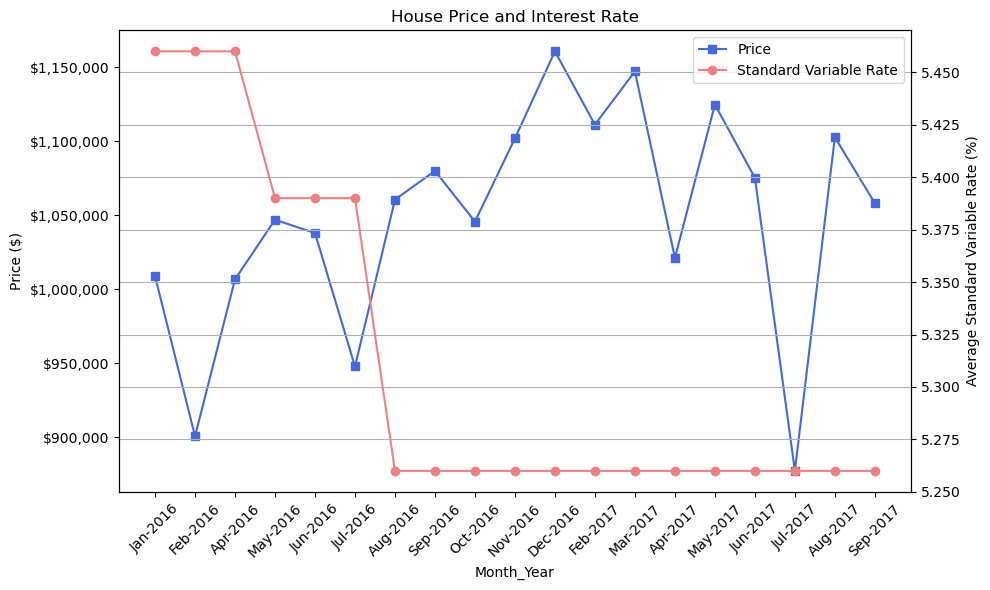

In [22]:
# Create a figure and axis objects
fig, ax1 = plt.subplots(figsize=(10, 6))  # set the figure size

# Add a second axis
ax2 = ax1.twinx()

# Set x-axis label
ax1.set_xlabel("Month_Year")

# Set the x-axis labels to be the unique values in the "Month_Year" column
ax1.set_xticks(range(len(x_labels)))
ax1.set_xticklabels(x_labels, rotation=45)

# Set y-axis labels
ax1.set_ylabel("Price ($)")
ax2.set_ylabel("Average Standard Variable Rate (%)")

# Format the y-axis ticks to display values in dollars
fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax1.yaxis.set_major_formatter(tick)

# Plot the data on each axis and add legends
p1 = ax1.plot(price_interest_rate_df["Month_Year"], price_interest_rate_df["Price"], color="royalblue", marker="s", label="Price")
p2 = ax2.plot(price_interest_rate_df["Month_Year"], price_interest_rate_df["Avg_Standard_Rate"], color="lightcoral", marker="o", label="Standard Variable Rate")

# Combine the legends and place it below the graph title
lines = p1 + p2
labels = [l.get_label() for l in lines]
plt.legend(lines, labels, loc='upper right')

# Set the title
plt.title("House Price and Interest Rate")

# Add features to the plot
plt.grid()

# Save the figure with tight layout
plt.tight_layout()  # adjust the plot layout
plt.savefig("Output Data/Graph Images/PriceVsPeriod&InterestRate", dpi=300)  # set the resolution
plt.show()


<font size ="7"> Question 2: Location, Location, Location: Analysing the Impact of Suburb, Region, and Distance to CBD on Melbourne Property Prices.

Text(0, 0.5, 'Price')

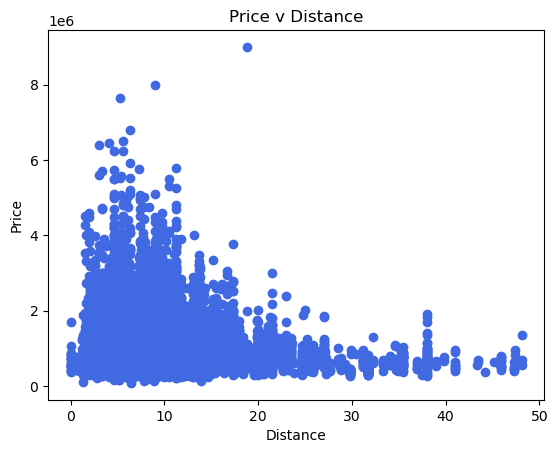

In [26]:
#turning columns to numaric format
x=mel_sales_df['Distance'] = pd.to_numeric(mel_sales_df['Distance'])
y=mel_sales_df['Price'] = pd.to_numeric(mel_sales_df['Price'])

#scatter plot for price v distance
plt.scatter(x,y,color="royalblue")
plt.title("Price v Distance")
plt.xlabel("Distance")
plt.ylabel("Price")

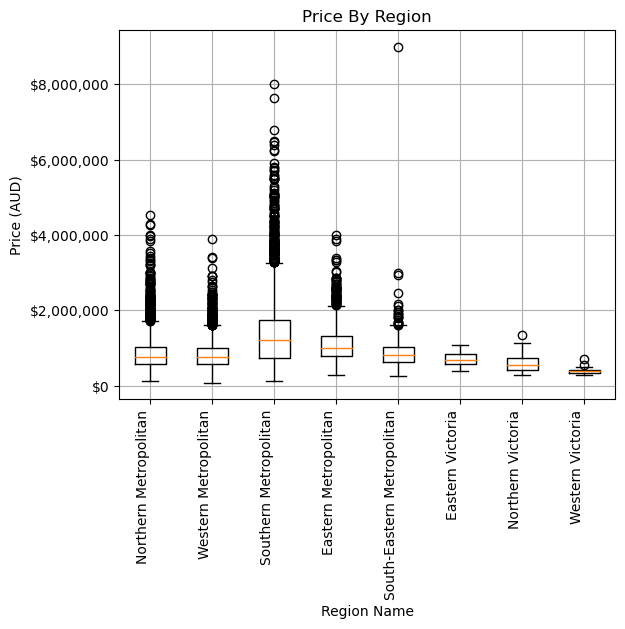

In [39]:
#filter out the dataframe using region name
all_region=mel_sales_df["Regionname"].unique()
df1=mel_sales_df.loc[mel_sales_df["Regionname"]==all_region[0]]
df2=mel_sales_df.loc[mel_sales_df["Regionname"]==all_region[1]]
df3=mel_sales_df.loc[mel_sales_df["Regionname"]==all_region[2]]
df4=mel_sales_df.loc[mel_sales_df["Regionname"]==all_region[3]]
df5=mel_sales_df.loc[mel_sales_df["Regionname"]==all_region[4]]
df6=mel_sales_df.loc[mel_sales_df["Regionname"]==all_region[5]]
df7=mel_sales_df.loc[mel_sales_df["Regionname"]==all_region[6]]
df8=mel_sales_df.loc[mel_sales_df["Regionname"]==all_region[7]]

#Find median
medians = [df["Price"].median() for df in [df1, df2, df3, df4, df5, df6, df7, df8]]

#boxplot
Label=['Northern Metropolitan', 'Western Metropolitan',
       'Southern Metropolitan', 'Eastern Metropolitan',
       'South-Eastern Metropolitan', 'Eastern Victoria',
       'Northern Victoria', 'Western Victoria']
results=[df1["Price"],df2["Price"],df3["Price"],df4["Price"],df5["Price"],df6["Price"],df7["Price"],df8["Price"]]
box_plot, region_plot=plt.subplots()
plt.xticks(rotation=90, ha='right')
region_plot.boxplot(results, labels=Label)

#Format the y-axis to display values in dollars
fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
region_plot.yaxis.set_major_formatter(tick)

#Assign names to the figure
region_plot.set_title('Price By Region')
region_plot.set_ylabel('Price (AUD)')
region_plot.set_xlabel('Region Name')

plt.grid()
plt.savefig('Output Data/Graph Images/Liam_Box_PlotByRegion', bbox_inches='tight')

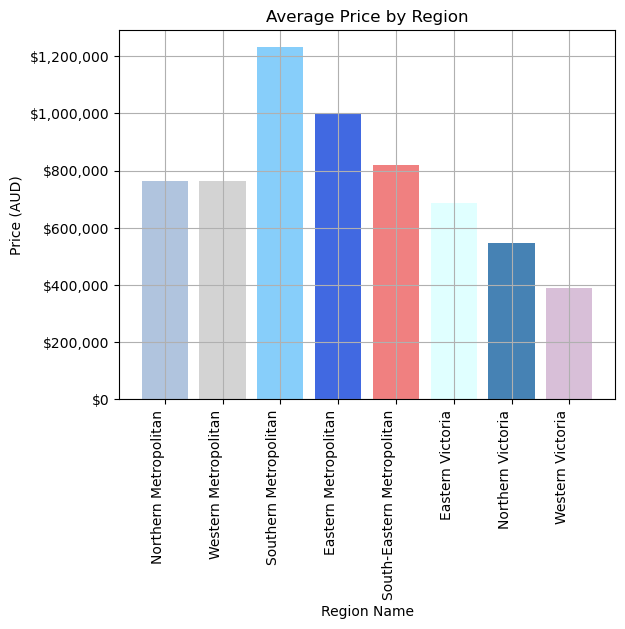

In [40]:
# Select data
bar_results = medians
labels = Label
fig, x = plt.subplots()

# Plot the bar chart with different colors for each bar
x.bar(labels, bar_results, color=colors)

# Format the y-axis to display values in dollars
fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
x.yaxis.set_major_formatter(tick)

# Assign names to the figure
x.set_title('Average Price by Region')
x.set_ylabel('Price (AUD)')
x.set_xlabel('Region Name')
plt.xticks(rotation=90, ha='right')
plt.grid()

# Save the figure
plt.savefig('Output Data/Graph Images/Liam_AveragePriceByReagionBar_chart.png', bbox_inches='tight')
plt.show()

/var/folders/c6/f4lv068572x0t6lvnvn2yjyc0000gn/T/ipykernel_68715/1739225665.py:16: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(inside_col, ax=ax, label='Inside 15km', shade=True)
/var/folders/c6/f4lv068572x0t6lvnvn2yjyc0000gn/T/ipykernel_68715/1739225665.py:17: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(outside_col, ax=ax, label='Outside 15km', shade=True)


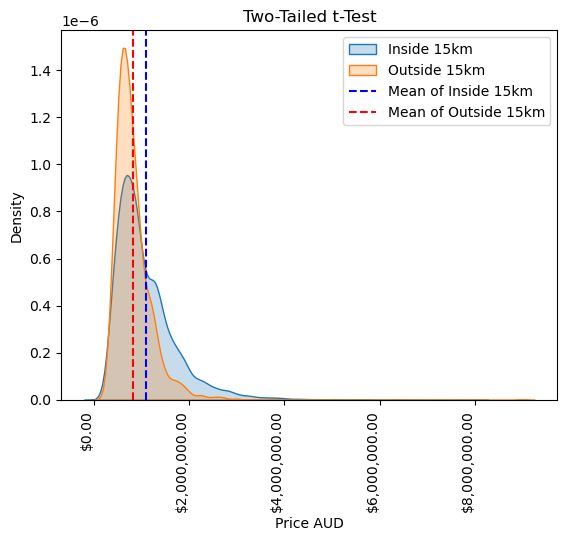

t-statistic: 19.113053516390284
p-value: 1.1895198924708595e-80


In [41]:
#T-test
inside_15km=mel_sales_df.loc[mel_sales_df["Distance"]<= 15]
outside_15km=mel_sales_df.loc[mel_sales_df["Distance"]> 15]
inside_col=inside_15km['Price']
outside_col=outside_15km['Price']

av_1=inside_col.mean()
av_2=outside_col.mean()


# Conduct independent t-test
t_stat, p_value = stats.ttest_ind(inside_col,outside_col)

# Plot using KDE plots
fig, ax = plt.subplots()
sns.kdeplot(inside_col, ax=ax, label='Inside 15km', shade=True)
sns.kdeplot(outside_col, ax=ax, label='Outside 15km', shade=True)
ax.axvline(x=np.mean(inside_col), color='blue', linestyle='--', label='Mean of Inside 15km')
ax.axvline(x=np.mean(outside_col), color='red', linestyle='--', label='Mean of Outside 15km')
plt.xticks(rotation=90, ha='right')
# Format the y-axis to display prices in dollars
fmt = '${x:,.2f}'
tick = mtick.StrMethodFormatter(fmt)
ax.xaxis.set_major_formatter(tick)

ax.set_xlabel('Price AUD')
ax.set_ylabel('Density')
ax.set_title('Two-Tailed t-Test')
ax.legend()
plt.savefig('Output Data/Graph Images/Liam_DistanceT-Test.png', bbox_inches='tight')
plt.show()

# Print the t-statistic and p-value
print('t-statistic:', t_stat)
print('p-value:', p_value)

/var/folders/c6/f4lv068572x0t6lvnvn2yjyc0000gn/T/ipykernel_68715/447920671.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(inside_col, ax=ax, label='Inside 15km', shade=True)
/var/folders/c6/f4lv068572x0t6lvnvn2yjyc0000gn/T/ipykernel_68715/447920671.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(outside_col, ax=ax, label='Outside 15km', shade=True)


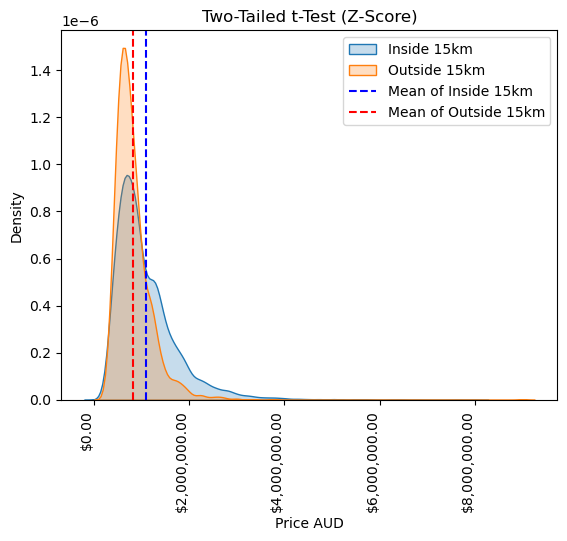

In [42]:
# Plot using KDE plots
fig, ax = plt.subplots()
sns.kdeplot(inside_col, ax=ax, label='Inside 15km', shade=True)
sns.kdeplot(outside_col, ax=ax, label='Outside 15km', shade=True)
ax.axvline(x=np.mean(inside_col), color='blue', linestyle='--', label='Mean of Inside 15km')
ax.axvline(x=np.mean(outside_col), color='red', linestyle='--', label='Mean of Outside 15km')
plt.xticks(rotation=90, ha='right')

# Remove outliers using z-score (Outside)
z_scores = stats.zscore(inside_col)
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3)
inside_col = inside_col[filtered_entries]

# Remove outliers using z-score (Inside)
z_scores = stats.zscore(outside_col)
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3)
outside_col = outside_col[filtered_entries]

# Format the y-axis to display prices in dollars
fmt = '${x:,.2f}'
tick = mtick.StrMethodFormatter(fmt)
ax.xaxis.set_major_formatter(tick)

ax.set_xlabel('Price AUD')
ax.set_ylabel('Density')
ax.set_title('Two-Tailed t-Test (Z-Score)')
ax.legend()
plt.savefig('Output Data/Graph Images/Liam_DistanceT-Test(Z-Score).png', bbox_inches='tight')
plt.show()


<font size ="5"> Add Minh's Code here

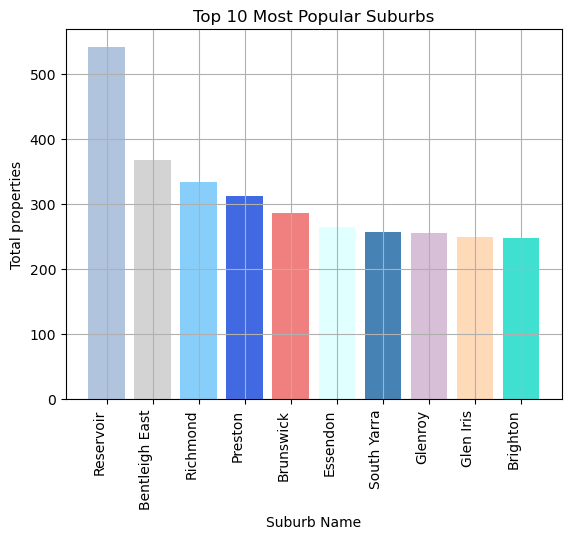

array([541, 368, 333, 312, 286, 265, 257, 256, 249, 247])

In [35]:
sub_count=mel_sales_df["Suburb"].value_counts().values[:10]
sub_name=mel_sales_df["Suburb"].value_counts().head(10).index.tolist()

labels = Label
fig, x = plt.subplots()

# Plot the bar chart with different colors for each bar
x.bar(sub_name, sub_count, color=colors)


# Assign names to the figure
x.set_title('Top 10 Most Popular Suburbs')
x.set_ylabel('Total properties')
x.set_xlabel('Suburb Name')
plt.xticks(rotation=90, ha='right')
plt.grid()

# Save the figure
plt.savefig('subs_bar.png', bbox_inches='tight')
plt.show()



sub_count

<font size ="7"> Question 3:Price vs Charaterics: Investigating the Relationship Between Property Size and Sale Price in the Melbourne Real Estate Market.

In [ ]:
#Load in csv
csv_file = Path("Resources/Property_Sales_Melbourne_City.csv")
v4_mel_sales_df = pd.read_csv(csv_file)
v4_mel_sales_df.head()

,Unnamed: 0,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,1,Abbotsford,85 Turner St,2,House,1480000,S,Biggin,3/12/2016,2.5,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,2,Abbotsford,25 Bloomburg St,2,House,1035000,S,Biggin,4/2/2016,2.5,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,4,Abbotsford,5 Charles St,3,House,1465000,SP,Biggin,4/3/2017,2.5,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,5,Abbotsford,40 Federation La,3,House,850000,PI,Biggin,4/3/2017,2.5,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,6,Abbotsford,55a Park St,4,House,1600000,VB,Nelson,4/6/2016,2.5,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


In [ ]:
#Remove rows with missing distance data & Erroneous Price data
#Remove outlier rooms (<6)
v4_mel_sales_df = v4_mel_sales_df.loc[v4_mel_sales_df['Distance']>=0]
v4_mel_sales_df = v4_mel_sales_df.loc[v4_mel_sales_df['Price']>0]
#v4_mel_sales_df = v4_mel_sales_df.loc[v4_mel_sales_df['Rooms']<6]
v4_mel_sales_df.head()

#convert data to numeric
v4_mel_sales_df['Distance']=pd.to_numeric(v4_mel_sales_df['Distance'])
v4_mel_sales_df['Price']=pd.to_numeric(v4_mel_sales_df['Price'])
v4_mel_sales_df['Landsize']=pd.to_numeric(v4_mel_sales_df['Landsize'])

print(v4_mel_sales_df.columns.tolist()) #confirm names of columns
v4_mel_sales_df.head()


['Unnamed: 0', 'Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG', 'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car', 'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude', 'Longtitude', 'Regionname', 'Propertycount']


,Unnamed: 0,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,1,Abbotsford,85 Turner St,2,House,1480000,S,Biggin,3/12/2016,2.5,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,2,Abbotsford,25 Bloomburg St,2,House,1035000,S,Biggin,4/2/2016,2.5,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,4,Abbotsford,5 Charles St,3,House,1465000,SP,Biggin,4/3/2017,2.5,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,5,Abbotsford,40 Federation La,3,House,850000,PI,Biggin,4/3/2017,2.5,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,6,Abbotsford,55a Park St,4,House,1600000,VB,Nelson,4/6/2016,2.5,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


In [ ]:
#-------------------------Boxplot Distributions & Outliers

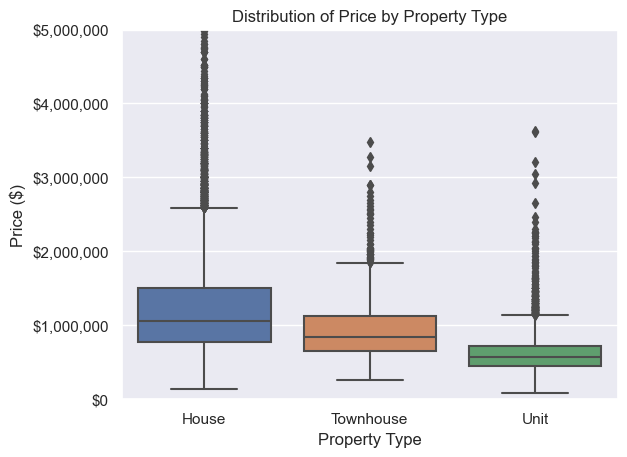

Price Qantile Data by Type
----------------------------------------------
Identifying House Price Outliers
The lower quartile of House Price is: $772000.0
The upper quartile of House Price is: $1500000.0
The interquartile range of House Price is: $728000.0
The the median of House Price is: $1060000.0
 
OUTLIERS: Values above $2592000.0 could be House Price outliers.
----------------------------------------------
Identifying Townhouse Price Outliers
The lower quartile of Townhouse Price is: $652500.0
The upper quartile of Townhouse Price is: $1130000.0
The interquartile range of Townhouse Price is: $477500.0
The the median of Townhouse Price is: 841000.0
 
OUTLIERS: Values above $1846250.0 could be Townhouse Price outliers.
----------------------------------------------
Identifying Unit Price Outliers
The lower quartile of Unit Price is: $442000.0
The upper quartile of Unit Price is: $720000.0
The interquartile range of Unit Price is: $278000.0
The the median of Unit Price is: $570000.0

In [ ]:
#Key values to review include Price, Distance, Landsize by property type to determine which has most impact on prics.
#When reviewing follow - Price 

# Create boxplot by unit to viee distribution of price 
# categorise by Type - (h)ouse , (t)ownhouse , (unit)
sns.set(style="darkgrid")
boxplot = sns.boxplot(data=v4_mel_sales_df, x='Type', y='Price')
boxplot.set(title='Distribution of Price by Property Type', ylabel='Price ($)', xlabel='Property Type', ylim=(-100,5000000))

# Format the y-axis ticks to display values in dollars
fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
boxplot.yaxis.set_major_formatter(tick)

plt.show()


#-------------------------------------------------
#Price Outliers

#Use Quartile by Type to identify Price outliers
#categorise by Type - (h)ouse , (t)ownhouse , (unit)
hp_Price= v4_mel_sales_df.loc[(v4_mel_sales_df["Type"]=="House")&(v4_mel_sales_df["Price"]!=0),"Price"]
tp_Price =v4_mel_sales_df.loc[(v4_mel_sales_df["Type"]=="Townhouse")&(v4_mel_sales_df["Price"]!=0),"Price"]
up_Price =v4_mel_sales_df.loc[(v4_mel_sales_df["Type"]=="Unit")&(v4_mel_sales_df["Price"]!=0),"Price"]

print("Price Qantile Data by Type")
#Price Quartiles
#house
hp_quartiles = hp_Price.quantile([.25,.5,.75])
hp_lowerq = hp_quartiles[0.25]
hp_upperq = hp_quartiles[0.75]
hp_iqr = round((hp_upperq-hp_lowerq),0)
hp_lower_bound = round((hp_lowerq - (1.5*hp_iqr)),0)
hp_upper_bound = round((hp_upperq + (1.5*hp_iqr)),0)
print("----------------------------------------------")
print("Identifying House Price Outliers")
print(f"The lower quartile of House Price is: ${hp_lowerq}")
print(f"The upper quartile of House Price is: ${hp_upperq}")
print(f"The interquartile range of House Price is: ${hp_iqr}")
print(f"The the median of House Price is: ${hp_quartiles[0.5]}")
print(" ")
if hp_lower_bound > 0:
    print(f"OUTLIERS: Values below ${hp_lower_bound} could be House Price outliers.")
print(f"OUTLIERS: Values above ${hp_upper_bound} could be House Price outliers.")
print("----------------------------------------------")

#townhouse
tp_quartiles = tp_Price.quantile([.25,.5,.75])
tp_lowerq = tp_quartiles[0.25]
tp_upperq = tp_quartiles[0.75]
tp_iqr = round((tp_upperq-tp_lowerq),0)
tp_lower_bound = round((tp_lowerq - (1.5*tp_iqr)),0)
tp_upper_bound = round((tp_upperq + (1.5*tp_iqr)),0)

print("Identifying Townhouse Price Outliers")
print(f"The lower quartile of Townhouse Price is: ${tp_lowerq}")
print(f"The upper quartile of Townhouse Price is: ${tp_upperq}")
print(f"The interquartile range of Townhouse Price is: ${tp_iqr}")
print(f"The the median of Townhouse Price is: {tp_quartiles[0.5]}")
print(" ")
if tp_lower_bound > 0:
    print(f"OUTLIERS: Values below ${tp_lower_bound} could be Townhouse Price outliers.")
print(f"OUTLIERS: Values above ${tp_upper_bound} could be Townhouse Price outliers.")
print("----------------------------------------------")

#Unit
up_quartiles = up_Price.quantile([.25,.5,.75])
up_lowerq = up_quartiles[0.25]
up_upperq = up_quartiles[0.75]
up_iqr = round((up_upperq-up_lowerq),0)
up_lower_bound = round((up_lowerq - (1.5*up_iqr)),0)
up_upper_bound = round((up_upperq + (1.5*up_iqr)),0)

print("Identifying Unit Price Outliers")
print(f"The lower quartile of Unit Price is: ${up_lowerq}")
print(f"The upper quartile of Unit Price is: ${up_upperq}")
print(f"The interquartile range of Unit Price is: ${up_iqr}")
print(f"The the median of Unit Price is: ${up_quartiles[0.5]}")
print(" ")
if up_lower_bound > 0:
    print(f"OUTLIERS: Values below ${up_lower_bound} could be Unit Price outliers.")
print(f"OUTLIERS: Values above ${up_upper_bound} could be Unit Price outliers.")
print("----------------------------------------------")

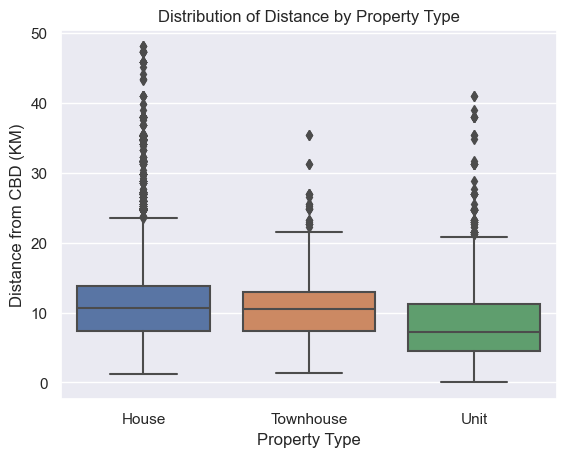

Distance Qantile Data by Type
----------------------------------------------
Identifying House Distance Outliers
The lower quartile of House Distance to CBD is: 7.3 km
The upper quartile of House Distance to CBD  is: 13.8 km
The interquartile range of House Distance to CBD  is: 6.5 km
The the median of House Distance to CBD  is: 10.6 km
 
OUTLIERS: Values above 23.55 km could be House Distance outliers.
----------------------------------------------
Identifying Townhouse Distance Outliers
The lower quartile of Townhouse Distance to CBD is: 7.3 km
The upper quartile of Townhouse Distance to CBD  is: 13.0 km
The interquartile range of Townhouse Distance to CBD  is: 5.7 km
The the median of Townhouse Distance to CBD  is: 10.5 km
 
OUTLIERS: Values above 21.55 km could be Townhouse Distance outliers.
----------------------------------------------
Identifying Unit Distance Outliers
The lower quartile of Unit Distance to CBD is: 4.5 km
The upper quartile of Unit Distance to CBD  is: 11.2 km


In [ ]:
# Create boxplot by unit to distribution of price
# categorise by Type - (h)ouse , (t)ownhouse , (unit) 
sns.set(style="darkgrid")
boxplot= sns.boxplot(data=v4_mel_sales_df, x='Type', y='Distance').set(
    title='Distribution of Distance by Property Type', ylabel = "Distance from CBD (KM)", 
    xlabel = "Property Type")
plt.show()


#------------------------------------------------------------------
# Distance Outliers


# Use Quartile by Type to identify distance outliers
hd_distance= v4_mel_sales_df.loc[(v4_mel_sales_df["Type"]=="House")&(v4_mel_sales_df["Distance"]!=0),"Distance"]
td_distance =v4_mel_sales_df.loc[(v4_mel_sales_df["Type"]=="Townhouse")&(v4_mel_sales_df["Distance"]!=0),"Distance"]
ud_distance =v4_mel_sales_df.loc[(v4_mel_sales_df["Type"]=="Unit")&(v4_mel_sales_df["Distance"]!=0),"Distance"]

print("Distance Qantile Data by Type")


#Distance Quartiles
#house
hd_quartiles = hd_distance.quantile([.25,.5,.75])
hd_lowerq = hd_quartiles[0.25]
hd_upperq = hd_quartiles[0.75]
hd_iqr = round((hd_upperq-hd_lowerq),2)
hd_lower_bound = round((hd_lowerq - (1.5*hd_iqr)),2)
hd_upper_bound = round((hd_upperq + (1.5*hd_iqr)),2)
print("----------------------------------------------")
print("Identifying House Distance Outliers")
print(f"The lower quartile of House Distance to CBD is: {hd_lowerq} km")
print(f"The upper quartile of House Distance to CBD  is: {hd_upperq} km")
print(f"The interquartile range of House Distance to CBD  is: {hd_iqr} km")
print(f"The the median of House Distance to CBD  is: {hd_quartiles[0.5]} km")
print(" ")
if hd_lower_bound > 0:
    print(f"OUTLIERS: Values below {hd_lower_bound} km could be House Distance outliers.")
print(f"OUTLIERS: Values above {hd_upper_bound} km could be House Distance outliers.")
print("----------------------------------------------")

#townhouse
td_quartiles = td_distance.quantile([.25,.5,.75])
td_lowerq = td_quartiles[0.25]
td_upperq = td_quartiles[0.75]
td_iqr = round((td_upperq-td_lowerq),2)
td_lower_bound = round((td_lowerq - (1.5*td_iqr)),2)
td_upper_bound = round((td_upperq + (1.5*td_iqr)),2)

print("Identifying Townhouse Distance Outliers")
print(f"The lower quartile of Townhouse Distance to CBD is: {td_lowerq} km")
print(f"The upper quartile of Townhouse Distance to CBD  is: {td_upperq} km")
print(f"The interquartile range of Townhouse Distance to CBD  is: {td_iqr} km")
print(f"The the median of Townhouse Distance to CBD  is: {td_quartiles[0.5]} km")
print(" ")
if td_lower_bound > 0:
    print(f"OUTLIERS: Values below {td_lower_bound} km could be Townhouse Distance outliers.")
print(f"OUTLIERS: Values above {td_upper_bound} km could be Townhouse Distance outliers.")
print("----------------------------------------------")

#Unit
ud_quartiles = ud_distance.quantile([.25,.5,.75])
ud_lowerq = ud_quartiles[0.25]
ud_upperq = ud_quartiles[0.75]
ud_iqr = round((ud_upperq-ud_lowerq),2)
ud_lower_bound = round((ud_lowerq - (1.5*ud_iqr)),2)
ud_upper_bound = round((ud_upperq + (1.5*ud_iqr)),2)


print("Identifying Unit Distance Outliers")
print(f"The lower quartile of Unit Distance to CBD is: {ud_lowerq} km")
print(f"The upper quartile of Unit Distance to CBD  is: {ud_upperq} km")
print(f"The interquartile range of Unit Distance to CBD  is: {ud_iqr} km")
print(f"The the median of Unit Distance to CBD  is: {ud_quartiles[0.5]} km")
print(" ")
if ud_lower_bound > 0:
    print(f"OUTLIERS: Values below {ud_lower_bound} km could be Unit Distance outliers.")
print(f"OUTLIERS: Values above {ud_upper_bound} km could be Unit Distance outliers.")
print("----------------------------------------------")


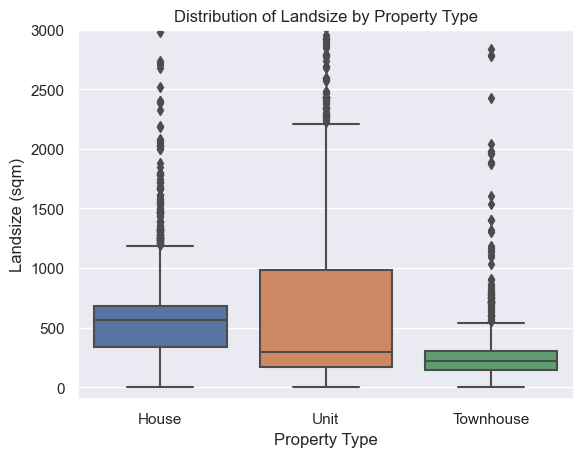

Plot Summary: Due to the varying dirstibution in peoperty Type - each set should be analysed seperately when reviewing distribution and outliers
Landsize Qantile Data by Type
----------------------------------------------
Identifying House Landsize Outliers
The lower quartile of House Landsize is: 339.0 sqm
The upper quartile of House Landsize is: 679.0 sqm
The interquartile range of House Landsize is: 340.0 sqm
The the median of House Landsize is: 565.0 sqm
 
OUTLIERS: Values above 1189.0 sqm could be House Landsize outliers.
----------------------------------------------
Identifying Townhouse Landsize Outliers
The lower quartile of Townhouse Landsize is: 147.0 sqm
The upper quartile of Townhouse Landsize is: 307.25 sqm
The interquartile range of Townhouse Landsize is: 160.25 sqm
The the median of Townhouse Landsize is: 217.0 sqm
 
OUTLIERS: Values above 547.62 sqm could be Townhouse Landsize outliers.
----------------------------------------------
Identifying Unit Landsize Outliers
T

In [ ]:
# Create boxplot by unit to viee distribution of price 
sns.set(style="darkgrid")
mel_sales_ls_df = v4_mel_sales_df.loc[(v4_mel_sales_df["Landsize"]>0)]
boxplot= sns.boxplot(data=mel_sales_ls_df, x='Type', y='Landsize').set(
    title='Distribution of Landsize by Property Type', ylabel = "Landsize (sqm)", 
    xlabel = "Property Type",ylim = (-100,3000))
plt.show()
print("Plot Summary: Due to the varying dirstibution in peoperty Type - each set should be analysed seperately when reviewing distribution and outliers")
#mel_sales_ls_df.head()


#---------------------------------------------------

#Landsize

# Use quartiling by type for Landsize outliers to remove:
hl_landsize= v4_mel_sales_df.loc[(v4_mel_sales_df["Type"]=="House")&(v4_mel_sales_df["Landsize"]>0),"Landsize"]
tl_landsize =v4_mel_sales_df.loc[(v4_mel_sales_df["Type"]=="Townhouse")&(v4_mel_sales_df["Landsize"]>0),"Landsize"]
ul_landsize =v4_mel_sales_df.loc[(v4_mel_sales_df["Type"]=="Unit")&(v4_mel_sales_df["Landsize"]>00),"Landsize"]


print("Landsize Qantile Data by Type")

#Landsize Quartiles
#house
hl_quartiles = hl_landsize.quantile([.25,.5,.75])
hl_lowerq = hl_quartiles[0.25]
hl_upperq = hl_quartiles[0.75]
hl_iqr = round((hl_upperq-hl_lowerq),2)
hl_lower_bound = round((hl_lowerq - (1.5*hl_iqr)),2)
hl_upper_bound = round((hl_upperq + (1.5*hl_iqr)),2)
print("----------------------------------------------")
print("Identifying House Landsize Outliers")
print(f"The lower quartile of House Landsize is: {hl_lowerq} sqm")
print(f"The upper quartile of House Landsize is: {hl_upperq} sqm")
print(f"The interquartile range of House Landsize is: {hl_iqr} sqm")
print(f"The the median of House Landsize is: {hl_quartiles[0.5]} sqm")
print(" ")
if hl_lower_bound > 0:
  print(f"OUTLIERS: Values below {hl_lower_bound} sqm could be House Landsize outliers.")
print(f"OUTLIERS: Values above {hl_upper_bound} sqm could be House Landsize outliers.")
print("----------------------------------------------")

#townhouse
tl_quartiles = tl_landsize.quantile([.25,.5,.75])
tl_lowerq = tl_quartiles[0.25]
tl_upperq = tl_quartiles[0.75]
tl_iqr = round((tl_upperq-tl_lowerq),2)
tl_lower_bound = round((tl_lowerq - (1.5*tl_iqr)),2)
tl_upper_bound = round((tl_upperq + (1.5*tl_iqr)),2)

print("Identifying Townhouse Landsize Outliers")
print(f"The lower quartile of Townhouse Landsize is: {tl_lowerq} sqm")
print(f"The upper quartile of Townhouse Landsize is: {tl_upperq} sqm")
print(f"The interquartile range of Townhouse Landsize is: {tl_iqr} sqm")
print(f"The the median of Townhouse Landsize is: {tl_quartiles[0.5]} sqm")
print(" ")
if tl_lower_bound > 0:
  print(f"OUTLIERS: Values below {tl_lower_bound} sqm could be Townhouse Landsize outliers.")
print(f"OUTLIERS: Values above {tl_upper_bound} sqm could be Townhouse Landsize outliers.")
print("----------------------------------------------")

#Unit
ul_quartiles = ul_landsize.quantile([.25,.5,.75])
ul_lowerq = ul_quartiles[0.25]
ul_upperq = ul_quartiles[0.75]
ul_iqr = round((ul_upperq-ul_lowerq),2)
ul_lower_bound = round((ul_lowerq - (1.5*ul_iqr)),2)
ul_upper_bound = round((ul_upperq + (1.5*ul_iqr)),2)

print("Identifying Unit Landsize Outliers")
print(f"The lower quartile of Unit Landsize is: {ul_lowerq} sqm")
print(f"The upper quartile of Unit Landsize is: {ul_upperq} sqm")
print(f"The interquartile range of Unit Landsize is: {ul_iqr} sqm")
print(f"The the median of Unit Landsize is: {ul_quartiles[0.5]} sqm")
print(" ")
if ul_lower_bound > 0:
  print(f"OUTLIERS: Values below {ul_lower_bound} sqm could be Unit Landsize outliers.")
print(f"OUTLIERS: Values above {ul_upper_bound} sqm could be Unit Landsize outliers.")
print("----------------------------------------------")

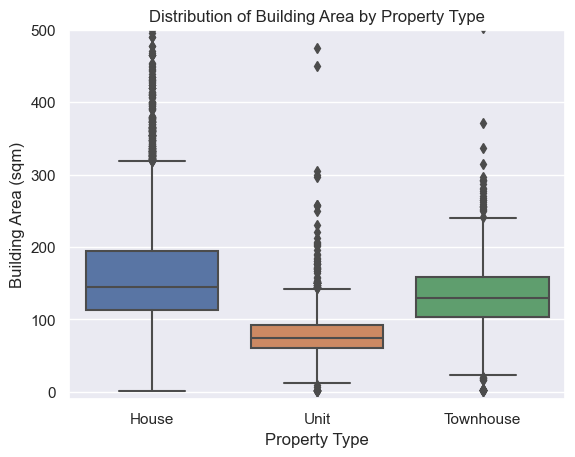

Plot Summary: Due to the varying dirstibution in peoperty Type - each set should be analysed seperately when reviewing distribution and outliers
Building Area Qantile Data by Type
----------------------------------------------
Identifying House BuildingArea Outliers
The lower quartile of House Building Area is: 113.0
The upper quartile of House Building Area is: 195.0964
The interquartile range of House BuildingArea is: 82.0
The the median of House BuildingArea is: 145.0
 
OUTLIERS: Values above 318.0 could be House Building Area outliers.
----------------------------------------------
Identifying Townhouse Building Area Outliers
The lower quartile of Townhouse Building Area is: 103.0
The upper quartile of Townhouse Building Area is: 158.0
The interquartile range of Townhouse Building Area is: 55.0
The the median of Townhouse BuildingArea is: 130.0
 
OUTLIERS: Values below 20.0 could be Townhouse Building Area outliers.
OUTLIERS: Values above 240.0 could be Townhouse Building Area outl

In [ ]:
# Create boxplot by unit to  Building Area distribution of price 
sns.set(style="darkgrid")
mel_sales_ba_df = v4_mel_sales_df.loc[(v4_mel_sales_df["BuildingArea"]>0)]
boxplot= sns.boxplot(data=mel_sales_ba_df, x='Type', y='BuildingArea').set(
    title='Distribution of Building Area by Property Type', ylabel = "Building Area (sqm)", 
    xlabel = "Property Type",ylim = (-10,500))
plt.show()
print("Plot Summary: Due to the varying dirstibution in peoperty Type - each set should be analysed seperately when reviewing distribution and outliers")
mel_sales_ba_df.head()


#-------------------------------------
#Building Area


#Use Quartile by Type to identify BuildingArea outliers
#categorise by Type - (h)ouse , (t)ownhouse , (unit)
ha_barea= v4_mel_sales_df.loc[(v4_mel_sales_df["Type"]=="House")&(v4_mel_sales_df["BuildingArea"]>0),"BuildingArea"]
ta_barea =v4_mel_sales_df.loc[(v4_mel_sales_df["Type"]=="Townhouse")&(v4_mel_sales_df["BuildingArea"]>0),"BuildingArea"]
u_barea =v4_mel_sales_df.loc[(v4_mel_sales_df["Type"]=="Unit")&(v4_mel_sales_df["BuildingArea"]>0),"BuildingArea"]

print("Building Area Qantile Data by Type")
#BuildingArea Quartiles
#house
ha_quartiles = ha_barea.quantile([.25,.5,.75])
ha_lowerq = ha_quartiles[0.25]
ha_upperq = ha_quartiles[0.75]
ha_iqr = round((ha_upperq-ha_lowerq),0)
ha_lower_bound = round((ha_lowerq - (1.5*ha_iqr)),0)
ha_upper_bound = round((ha_upperq + (1.5*ha_iqr)),0)
print("----------------------------------------------")
print("Identifying House BuildingArea Outliers")
print(f"The lower quartile of House Building Area is: {ha_lowerq}")
print(f"The upper quartile of House Building Area is: {ha_upperq}")
print(f"The interquartile range of House BuildingArea is: {ha_iqr}")
print(f"The the median of House BuildingArea is: {ha_quartiles[0.5]}")
print(" ")
if ha_lower_bound > 0:
    print(f"OUTLIERS: Values below {ha_lower_bound} could be House Building Area outliers.")
print(f"OUTLIERS: Values above {ha_upper_bound} could be House Building Area outliers.")
print("----------------------------------------------")

#townhouse
ta_quartiles = ta_barea.quantile([.25,.5,.75])
ta_lowerq = ta_quartiles[0.25]
ta_upperq = ta_quartiles[0.75]
ta_iqr = round((ta_upperq-ta_lowerq),0)
ta_lower_bound = round((ta_lowerq - (1.5*ta_iqr)),0)
ta_upper_bound = round((ta_upperq + (1.5*ta_iqr)),0)

print("Identifying Townhouse Building Area Outliers")
print(f"The lower quartile of Townhouse Building Area is: {ta_lowerq}")
print(f"The upper quartile of Townhouse Building Area is: {ta_upperq}")
print(f"The interquartile range of Townhouse Building Area is: {ta_iqr}")
print(f"The the median of Townhouse BuildingArea is: {ta_quartiles[0.5]}")
print(" ")
if ta_lower_bound > 0:
    print(f"OUTLIERS: Values below {ta_lower_bound} could be Townhouse Building Area outliers.")
print(f"OUTLIERS: Values above {ta_upper_bound} could be Townhouse Building Area outliers.")
print("----------------------------------------------")

#Unit
ua_quartiles = u_barea.quantile([.25,.5,.75])
ua_lowerq = ua_quartiles[0.25]
ua_upperq = ua_quartiles[0.75]
ua_iqr = round((ua_upperq-ua_lowerq),0)
ua_lower_bound = round((ua_lowerq - (1.5*ua_iqr)),0)
ua_upper_bound = round((ua_upperq + (1.5*ua_iqr)),0)

print("Identifying Unit BuildingArea Outliers")
print(f"The lower quartile of Unit BuildingArea is: {ua_lowerq}")
print(f"The upper quartile of Unit BuildingArea is: {ua_upperq}")
print(f"The interquartile range of Unit BuildingArea is: {ua_iqr}")
print(f"The the median of Unit BuildingArea is: {ua_quartiles[0.5]}")
print(" ")
if ua_lower_bound > 0:
    print(f"OUTLIERS: Values below {ua_lower_bound} could be Unit BuildingArea outliers.")
print(f"OUTLIERS: Values above {ua_upper_bound} could be Unit BuildingArea outliers.")
print("----------------------------------------------")


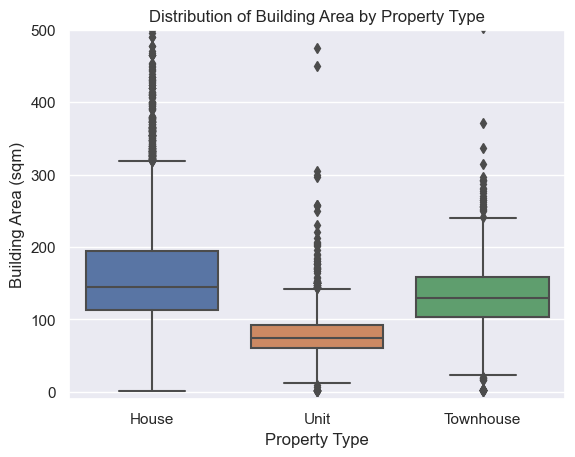

Plot Summary: Due to the varying dirstibution in peoperty Type - each set should be analysed seperately when reviewing distribution and outliers
Building Area Qantile Data by Type
----------------------------------------------
Identifying House BuildingArea Outliers
The lower quartile of House Building Area is: 113.0
The upper quartile of House Building Area is: 195.0964
The interquartile range of House BuildingArea is: 82.0
The the median of House BuildingArea is: 145.0
 
OUTLIERS: Values above 318.0 could be House Building Area outliers.
----------------------------------------------
Identifying Townhouse Building Area Outliers
The lower quartile of Townhouse Building Area is: 103.0
The upper quartile of Townhouse Building Area is: 158.0
The interquartile range of Townhouse Building Area is: 55.0
The the median of Townhouse BuildingArea is: 130.0
 
OUTLIERS: Values below 20.0 could be Townhouse Building Area outliers.
OUTLIERS: Values above 240.0 could be Townhouse Building Area outl

In [ ]:
# Create boxplot by unit to  Building Area distribution of price 
sns.set(style="darkgrid")
mel_sales_ba_df = v4_mel_sales_df.loc[(v4_mel_sales_df["BuildingArea"]>0)]
boxplot= sns.boxplot(data=mel_sales_ba_df, x='Type', y='BuildingArea').set(
    title='Distribution of Building Area by Property Type', ylabel = "Building Area (sqm)", 
    xlabel = "Property Type",ylim = (-10,500))
plt.show()
print("Plot Summary: Due to the varying dirstibution in peoperty Type - each set should be analysed seperately when reviewing distribution and outliers")
mel_sales_ba_df.head()


#-------------------------------------
#Building Area


#Use Quartile by Type to identify BuildingArea outliers
#categorise by Type - (h)ouse , (t)ownhouse , (unit)
ha_barea= v4_mel_sales_df.loc[(v4_mel_sales_df["Type"]=="House")&(v4_mel_sales_df["BuildingArea"]>0),"BuildingArea"]
ta_barea =v4_mel_sales_df.loc[(v4_mel_sales_df["Type"]=="Townhouse")&(v4_mel_sales_df["BuildingArea"]>0),"BuildingArea"]
u_barea =v4_mel_sales_df.loc[(v4_mel_sales_df["Type"]=="Unit")&(v4_mel_sales_df["BuildingArea"]>0),"BuildingArea"]

print("Building Area Qantile Data by Type")
#BuildingArea Quartiles
#house
ha_quartiles = ha_barea.quantile([.25,.5,.75])
ha_lowerq = ha_quartiles[0.25]
ha_upperq = ha_quartiles[0.75]
ha_iqr = round((ha_upperq-ha_lowerq),0)
ha_lower_bound = round((ha_lowerq - (1.5*ha_iqr)),0)
ha_upper_bound = round((ha_upperq + (1.5*ha_iqr)),0)
print("----------------------------------------------")
print("Identifying House BuildingArea Outliers")
print(f"The lower quartile of House Building Area is: {ha_lowerq}")
print(f"The upper quartile of House Building Area is: {ha_upperq}")
print(f"The interquartile range of House BuildingArea is: {ha_iqr}")
print(f"The the median of House BuildingArea is: {ha_quartiles[0.5]}")
print(" ")
if ha_lower_bound > 0:
    print(f"OUTLIERS: Values below {ha_lower_bound} could be House Building Area outliers.")
print(f"OUTLIERS: Values above {ha_upper_bound} could be House Building Area outliers.")
print("----------------------------------------------")

#townhouse
ta_quartiles = ta_barea.quantile([.25,.5,.75])
ta_lowerq = ta_quartiles[0.25]
ta_upperq = ta_quartiles[0.75]
ta_iqr = round((ta_upperq-ta_lowerq),0)
ta_lower_bound = round((ta_lowerq - (1.5*ta_iqr)),0)
ta_upper_bound = round((ta_upperq + (1.5*ta_iqr)),0)

print("Identifying Townhouse Building Area Outliers")
print(f"The lower quartile of Townhouse Building Area is: {ta_lowerq}")
print(f"The upper quartile of Townhouse Building Area is: {ta_upperq}")
print(f"The interquartile range of Townhouse Building Area is: {ta_iqr}")
print(f"The the median of Townhouse BuildingArea is: {ta_quartiles[0.5]}")
print(" ")
if ta_lower_bound > 0:
    print(f"OUTLIERS: Values below {ta_lower_bound} could be Townhouse Building Area outliers.")
print(f"OUTLIERS: Values above {ta_upper_bound} could be Townhouse Building Area outliers.")
print("----------------------------------------------")

#Unit
ua_quartiles = u_barea.quantile([.25,.5,.75])
ua_lowerq = ua_quartiles[0.25]
ua_upperq = ua_quartiles[0.75]
ua_iqr = round((ua_upperq-ua_lowerq),0)
ua_lower_bound = round((ua_lowerq - (1.5*ua_iqr)),0)
ua_upper_bound = round((ua_upperq + (1.5*ua_iqr)),0)

print("Identifying Unit BuildingArea Outliers")
print(f"The lower quartile of Unit BuildingArea is: {ua_lowerq}")
print(f"The upper quartile of Unit BuildingArea is: {ua_upperq}")
print(f"The interquartile range of Unit BuildingArea is: {ua_iqr}")
print(f"The the median of Unit BuildingArea is: {ua_quartiles[0.5]}")
print(" ")
if ua_lower_bound > 0:
    print(f"OUTLIERS: Values below {ua_lower_bound} could be Unit BuildingArea outliers.")
print(f"OUTLIERS: Values above {ua_upper_bound} could be Unit BuildingArea outliers.")
print("----------------------------------------------")


The r-squared value is:0.1134
y = -34822x + 1521090


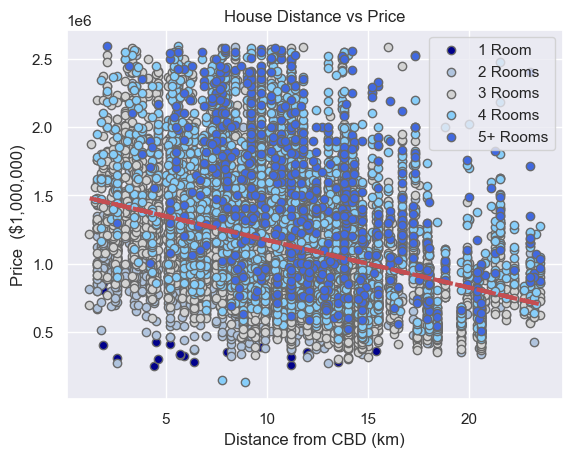

In [ ]:
#-------------------------Distance Scatter & Regression with Colour


# (h)ouse Distance vs Price
# Plot the linear model on top of scatter plot for Distance vs Price
# create df to exclude outliers (h)ouse distance and (h)ouse price 
hd_mel_sales_df = v4_mel_sales_df.loc[(v4_mel_sales_df["Distance"]<hd_upper_bound)&(v4_mel_sales_df["Price"]<hp_upper_bound)]
hd_distance = hd_mel_sales_df.loc[(hd_mel_sales_df["Type"]=="House"),"Distance"] 
hd_price = hd_mel_sales_df.loc[(hd_mel_sales_df["Type"]=="House"),"Price"]

#-- colour data series by room number

hd_distance_1 = hd_mel_sales_df.loc[(hd_mel_sales_df["Type"]=="House")&(hd_mel_sales_df["Rooms"]==1),"Distance"] 
hd_price_1 = hd_mel_sales_df.loc[(hd_mel_sales_df["Type"]=="House")&(hd_mel_sales_df["Rooms"]==1),"Price"]

hd_distance_2 = hd_mel_sales_df.loc[(hd_mel_sales_df["Type"]=="House")&(hd_mel_sales_df["Rooms"]==2),"Distance"] 
hd_price_2 = hd_mel_sales_df.loc[(hd_mel_sales_df["Type"]=="House")&(hd_mel_sales_df["Rooms"]==2),"Price"]

hd_distance_3 = hd_mel_sales_df.loc[(hd_mel_sales_df["Type"]=="House")&(hd_mel_sales_df["Rooms"]==3),"Distance"] 
hd_price_3 = hd_mel_sales_df.loc[(hd_mel_sales_df["Type"]=="House")&(hd_mel_sales_df["Rooms"]==3),"Price"]

hd_distance_4 = hd_mel_sales_df.loc[(hd_mel_sales_df["Type"]=="House")&(hd_mel_sales_df["Rooms"]==4),"Distance"] 
hd_price_4 = hd_mel_sales_df.loc[(hd_mel_sales_df["Type"]=="House")&(hd_mel_sales_df["Rooms"]==4),"Price"]

hd_distance_5a = hd_mel_sales_df.loc[(hd_mel_sales_df["Type"]=="House")&(hd_mel_sales_df["Rooms"]>=5),"Distance"] 
hd_price_5a = hd_mel_sales_df.loc[(hd_mel_sales_df["Type"]=="House")&(hd_mel_sales_df["Rooms"]>=5),"Price"]

#groups = v4_mel_sales_df.groupby("Type")

# Perform a linear regression on Distance vs Price
# Perform a linear regression on Distance vs Price
hd_slope, hd_int, hd_rvalue, hd_pvalue, hd_stderr = stats.linregress(hd_distance, hd_price)

# Create equation of line to calculate predicted number
hd_line_eq = f"y = {round(hd_slope)}x + {round(hd_int)}"

# Calculate the predicted values based on the linear regression
hd_fit = hd_slope * hd_distance + hd_int


#plt.scatter(hd_distance,hd_price, label = hd_colour)

plt.scatter(hd_distance_1,hd_price_1, color = 'darkblue',edgecolor='dimgrey', label = '1 Room')
plt.scatter(hd_distance_2,hd_price_2, color = 'lightsteelblue' ,edgecolor='dimgrey', label = '2 Rooms')
plt.scatter(hd_distance_3,hd_price_3, color = 'lightgrey' ,edgecolor='dimgrey',label = '3 Rooms')
plt.scatter(hd_distance_4,hd_price_4, color = 'lightskyblue' ,edgecolor='dimgrey',label = '4 Rooms')
plt.scatter(hd_distance_5a,hd_price_5a, color = 'royalblue' ,edgecolor='dimgrey',label = '5+ Rooms')
plt.plot(hd_distance,hd_fit,"r--", linewidth=3)
plt.legend(loc='upper right')

fmt = '${x:,.0f}'
#tick = mtick.StrMethodFormatter(fmt)
#ax.hd_price.set_major_formatter(tick) 

plt.title('House Distance vs Price')
plt.xlabel('Distance from CBD (km)')
plt.ylabel('Price  ($1,000,000)')
hd_rsquare= round((hd_rvalue**2),4)

plt.annotate(hd_line_eq,(5.8,0.8),fontsize=10,color="red")
print(f"The r-squared value is:{hd_rsquare}")
print(f"{hd_line_eq}")

#Save the figure 
#plt.tight_layot()
#plt.savefig("Output Data/Graph Images/HouseDistanceVsPrice")
#plt.show()

The r-squared value is:0.0056
y = -5865x + 950883


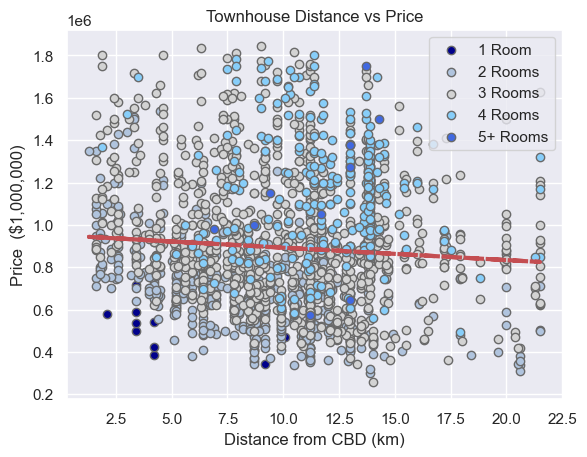

In [ ]:
# (t)ownhouse Distance vs Price

# Plot the linear model on top of scatter plot for Distance vs Price
# create df to exclude outliers (h)ouse distance and (h)ouse price 
td_mel_sales_df = v4_mel_sales_df.loc[(v4_mel_sales_df["Distance"]>=0)&(v4_mel_sales_df["Distance"]<td_upper_bound)&(v4_mel_sales_df["Price"]<tp_upper_bound)]
td_distance = td_mel_sales_df.loc[(td_mel_sales_df["Type"]=="Townhouse"),"Distance"] 
td_price = td_mel_sales_df.loc[(td_mel_sales_df["Type"]=="Townhouse"),"Price"]

#-- colour data series by room number

td_distance_1 = td_mel_sales_df.loc[(td_mel_sales_df["Type"]=="Townhouse")&(td_mel_sales_df["Rooms"]==1),"Distance"] 
td_price_1 = td_mel_sales_df.loc[(td_mel_sales_df["Type"]=="Townhouse")&(td_mel_sales_df["Rooms"]==1),"Price"]

td_distance_2 = td_mel_sales_df.loc[(td_mel_sales_df["Type"]=="Townhouse")&(td_mel_sales_df["Rooms"]==2),"Distance"] 
td_price_2 = td_mel_sales_df.loc[(td_mel_sales_df["Type"]=="Townhouse")&(td_mel_sales_df["Rooms"]==2),"Price"]

td_distance_3 = td_mel_sales_df.loc[(td_mel_sales_df["Type"]=="Townhouse")&(td_mel_sales_df["Rooms"]==3),"Distance"] 
td_price_3 = td_mel_sales_df.loc[(td_mel_sales_df["Type"]=="Townhouse")&(td_mel_sales_df["Rooms"]==3),"Price"]

td_distance_4 = td_mel_sales_df.loc[(td_mel_sales_df["Type"]=="Townhouse")&(td_mel_sales_df["Rooms"]==4),"Distance"] 
td_price_4 = td_mel_sales_df.loc[(td_mel_sales_df["Type"]=="Townhouse")&(td_mel_sales_df["Rooms"]==4),"Price"]

td_distance_5a = td_mel_sales_df.loc[(td_mel_sales_df["Type"]=="Townhouse")&(td_mel_sales_df["Rooms"]>=5),"Distance"] 
td_price_5a = td_mel_sales_df.loc[(td_mel_sales_df["Type"]=="Townhouse")&(td_mel_sales_df["Rooms"]>=5),"Price"]

#groups = v4_mel_sales_df.groupby("Type")

# Perform a linear regression on Distance vs Price
# Create equation of line to calculate predicted number
(td_slope, td_int, td_rvalue, td_pvalue, td_stderr) = stats.linregress(td_distance, td_price)
td_fit = td_distance * td_slope +td_int
td_line_eq = "y = " + str(round(td_slope)) + "x + " + str(round(td_int))

#plt.scatter(td_distance,td_price, label = td_colour)

plt.scatter(td_distance_1,td_price_1, color = 'darkblue',edgecolor='dimgrey', label = '1 Room')
plt.scatter(td_distance_2,td_price_2, color = 'lightsteelblue' ,edgecolor='dimgrey', label = '2 Rooms')
plt.scatter(td_distance_3,td_price_3, color = 'lightgrey' ,edgecolor='dimgrey',label = '3 Rooms')
plt.scatter(td_distance_4,td_price_4, color = 'lightskyblue' ,edgecolor='dimgrey',label = '4 Rooms')
plt.scatter(td_distance_5a,td_price_5a, color = 'royalblue' ,edgecolor='dimgrey',label = '5+ Rooms')
plt.plot(td_distance,td_fit,"r--", linewidth=3)
plt.legend(loc='upper right')

plt.title('Townhouse Distance vs Price')
plt.xlabel('Distance from CBD (km)')
plt.ylabel('Price  ($1,000,000)')

td_rsquare= round((td_rvalue**2),4)

plt.annotate(td_line_eq,(5.8,0.8),fontsize=10,color="red")
print(f"The r-squared value is:{td_rsquare}")
print(f"{td_line_eq}")
plt.show()

#Save the figure 
#plt.tight_layot()
#plt.savefig("Output Data/Graph Images/TH_DistanceVsPrice")
#plt.show()

The r-squared value is:0.0024
y = 2222x + 560334


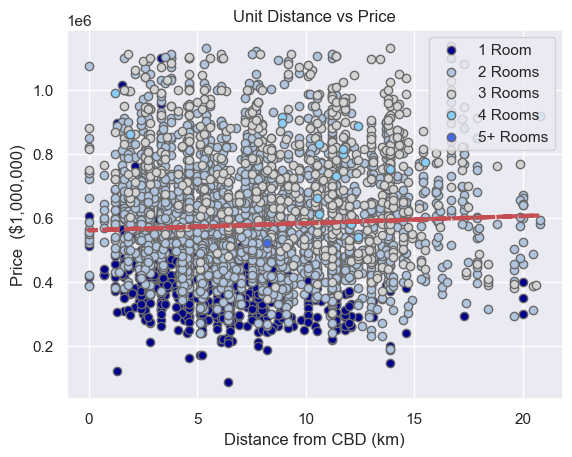

In [ ]:
# (u)nit Distance vs Price

# Plot the linear model on top of scatter plot for Distance vs Price
# create df to exclude outliers (h)ouse distance and (h)ouse price 
ud_mel_sales_df = v4_mel_sales_df.loc[(v4_mel_sales_df["Distance"]<ud_upper_bound)&(v4_mel_sales_df["Price"]<up_upper_bound)]
ud_distance = ud_mel_sales_df.loc[(ud_mel_sales_df["Type"]=="Unit"),"Distance"] 
ud_price = ud_mel_sales_df.loc[(ud_mel_sales_df["Type"]=="Unit"),"Price"]

#-- colour data series by room number

ud_distance_1 = ud_mel_sales_df.loc[(ud_mel_sales_df["Type"]=="Unit")&(ud_mel_sales_df["Rooms"]==1),"Distance"] 
ud_price_1 = ud_mel_sales_df.loc[(ud_mel_sales_df["Type"]=="Unit")&(ud_mel_sales_df["Rooms"]==1),"Price"]

ud_distance_2 = ud_mel_sales_df.loc[(ud_mel_sales_df["Type"]=="Unit")&(ud_mel_sales_df["Rooms"]==2),"Distance"] 
ud_price_2 = ud_mel_sales_df.loc[(ud_mel_sales_df["Type"]=="Unit")&(ud_mel_sales_df["Rooms"]==2),"Price"]

ud_distance_3 = ud_mel_sales_df.loc[(ud_mel_sales_df["Type"]=="Unit")&(ud_mel_sales_df["Rooms"]==3),"Distance"] 
ud_price_3 = ud_mel_sales_df.loc[(ud_mel_sales_df["Type"]=="Unit")&(ud_mel_sales_df["Rooms"]==3),"Price"]

ud_distance_4 = ud_mel_sales_df.loc[(ud_mel_sales_df["Type"]=="Unit")&(ud_mel_sales_df["Rooms"]==4),"Distance"] 
ud_price_4 = ud_mel_sales_df.loc[(ud_mel_sales_df["Type"]=="Unit")&(ud_mel_sales_df["Rooms"]==4),"Price"]

ud_distance_5a = ud_mel_sales_df.loc[(ud_mel_sales_df["Type"]=="Unit")&(ud_mel_sales_df["Rooms"]>=5),"Distance"] 
ud_price_5a = ud_mel_sales_df.loc[(ud_mel_sales_df["Type"]=="Unit")&(ud_mel_sales_df["Rooms"]>=5),"Price"]

#groups = v4_mel_sales_df.groupby("Type")

# Perform a linear regression on Distance vs Price
# Create equation of line to calculate predicted number
(ud_slope, ud_int, ud_rvalue, ud_pvalue, ud_stderr) = stats.linregress(ud_distance, ud_price)
ud_fit = ud_distance * ud_slope +ud_int
ud_line_eq = "y = " + str(round(ud_slope)) + "x + " + str(round(ud_int))

#plt.scatter(ud_distance,ud_price, label = ud_colour)

plt.scatter(ud_distance_1,ud_price_1, color = 'darkblue',edgecolor='dimgrey', label = '1 Room')
plt.scatter(ud_distance_2,ud_price_2, color = 'lightsteelblue' ,edgecolor='dimgrey', label = '2 Rooms')
plt.scatter(ud_distance_3,ud_price_3, color = 'lightgrey' ,edgecolor='dimgrey',label = '3 Rooms')
plt.scatter(ud_distance_4,ud_price_4, color = 'lightskyblue' ,edgecolor='dimgrey',label = '4 Rooms')
plt.scatter(ud_distance_5a,ud_price_5a, color = 'royalblue' ,edgecolor='dimgrey',label = '5+ Rooms')
plt.plot(ud_distance,ud_fit,"r--", linewidth=3)
plt.legend(loc='upper right')

plt.title('Unit Distance vs Price')
plt.xlabel('Distance from CBD (km)')
plt.ylabel('Price  ($1,000,000)')
ud_rsquare= round((ud_rvalue**2),4)

plt.annotate(ud_line_eq,(5.8,0.8),fontsize=10,color="red")
print(f"The r-squared value is:{ud_rsquare}")
print(f"{ud_line_eq}")
plt.show()

#Save the figure 
#plt.tight_layot()
#plt.savefig("Output Data/Graph Images/DistanceVsPrice")
#plt.show()




In [ ]:
#-------------------------Landsize Scatter & Regression

The r-squared value is:0.0085
y = 200x + 1045411


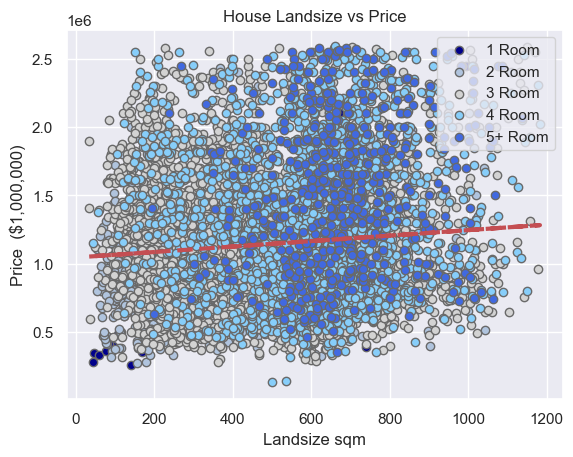

In [ ]:
#-------------------------------- Landsize
# (h)ouse Landsize vs Price
# Plot the linear model on top of scatter plot for Landsize vs Price
# create df to exclude outliers (h)ouse Landsize and (h)ouse price 
hl_mel_sales_df = v4_mel_sales_df.loc[(v4_mel_sales_df["Landsize"]>30)&(v4_mel_sales_df["Landsize"]<hl_upper_bound)&(v4_mel_sales_df["Price"]<hp_upper_bound)]
hl_Landsize = hl_mel_sales_df.loc[(hl_mel_sales_df["Type"]=="House"),"Landsize"] 
hl_price = hl_mel_sales_df.loc[(hl_mel_sales_df["Type"]=="House"),"Price"]

#-- colour data series by room number

hl_Landsize_1 = hl_mel_sales_df.loc[(hl_mel_sales_df["Type"]=="House")&(hl_mel_sales_df["Rooms"]==1),"Landsize"] 
hl_price_1 = hl_mel_sales_df.loc[(hl_mel_sales_df["Type"]=="House")&(hl_mel_sales_df["Rooms"]==1),"Price"]

hl_Landsize_2 = hl_mel_sales_df.loc[(hl_mel_sales_df["Type"]=="House")&(hl_mel_sales_df["Rooms"]==2),"Landsize"] 
hl_price_2 = hl_mel_sales_df.loc[(hl_mel_sales_df["Type"]=="House")&(hl_mel_sales_df["Rooms"]==2),"Price"]

hl_Landsize_3 = hl_mel_sales_df.loc[(hl_mel_sales_df["Type"]=="House")&(hl_mel_sales_df["Rooms"]==3),"Landsize"] 
hl_price_3 = hl_mel_sales_df.loc[(hl_mel_sales_df["Type"]=="House")&(hl_mel_sales_df["Rooms"]==3),"Price"]

hl_Landsize_4 = hl_mel_sales_df.loc[(hl_mel_sales_df["Type"]=="House")&(hl_mel_sales_df["Rooms"]==4),"Landsize"] 
hl_price_4 = hl_mel_sales_df.loc[(hl_mel_sales_df["Type"]=="House")&(hl_mel_sales_df["Rooms"]==4),"Price"]

hl_Landsize_5a = hl_mel_sales_df.loc[(hl_mel_sales_df["Type"]=="House")&(hl_mel_sales_df["Rooms"]>=5),"Landsize"] 
hl_price_5a = hl_mel_sales_df.loc[(hl_mel_sales_df["Type"]=="House")&(hl_mel_sales_df["Rooms"]>=5),"Price"]

#groups = v4_mel_sales_df.groupby("Type")

# Perform a linear regression on Landsize vs Price
# Create equation of line to calculate predicted number
(hl_slope, hl_int, hl_rvalue, hl_pvalue, hl_stderr) = stats.linregress(hl_Landsize, hl_price)
hl_fit = hl_Landsize * hl_slope +hl_int
hl_line_eq = "y = " + str(round(hl_slope)) + "x + " + str(round(hl_int))

#plt.scatter(hl_Landsize,hl_price, label = hl_colour)

plt.scatter(hl_Landsize_1,hl_price_1, color = 'darkblue',edgecolor='dimgrey', label = '1 Room')
plt.scatter(hl_Landsize_2,hl_price_2, color = 'lightsteelblue' ,edgecolor='dimgrey', label = '2 Room')
plt.scatter(hl_Landsize_3,hl_price_3, color = 'lightgrey' ,edgecolor='dimgrey', label = '3 Room')
plt.scatter(hl_Landsize_4,hl_price_4, color = 'lightskyblue' ,edgecolor='dimgrey', label = '4 Room')
plt.scatter(hl_Landsize_5a,hl_price_5a, color = 'royalblue' ,edgecolor='dimgrey', label = '5+ Room')
plt.plot(hl_Landsize,hl_fit,"r--", linewidth=3)
plt.legend(loc='upper right')

plt.title('House Landsize vs Price')
plt.xlabel('Landsize sqm')
plt.ylabel('Price  ($1,000,000)')
hl_rsquare= round((hl_rvalue**2),4)

plt.annotate(hl_line_eq,(5.8,0.8),fontsize=10,color="red")
print(f"The r-squared value is:{hl_rsquare}")
print(f"{hl_line_eq}")
plt.show()

#plt.tight_layot()
#plt.savefig("Output Data/Graph Images/HouseLandsizeVsPrice")
#plt.show()




The r-squared value is:0.2025
y = 1475x + 574667


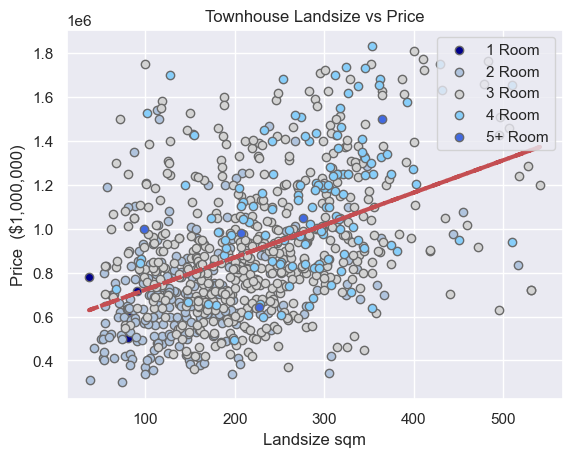

In [ ]:
#-------------------------------- Landsize
# (t)ownhouse Landsize vs Price
# Plot the linear model on top of scatter plot for Landsize vs Price
# create df to exclude outliers (h)ouse Landsize and (h)ouse price 
tl_mel_sales_df = v4_mel_sales_df.loc[(v4_mel_sales_df["Landsize"]>30)&(v4_mel_sales_df["Landsize"]<tl_upper_bound)&(v4_mel_sales_df["Price"]<tp_upper_bound)]
tl_Landsize = tl_mel_sales_df.loc[(tl_mel_sales_df["Type"]=="Townhouse"),"Landsize"] 
tl_price = tl_mel_sales_df.loc[(tl_mel_sales_df["Type"]=="Townhouse"),"Price"]

#-- colour data series by room number

tl_Landsize_1 = tl_mel_sales_df.loc[(tl_mel_sales_df["Type"]=="Townhouse")&(tl_mel_sales_df["Rooms"]==1),"Landsize"] 
tl_price_1 = tl_mel_sales_df.loc[(tl_mel_sales_df["Type"]=="Townhouse")&(tl_mel_sales_df["Rooms"]==1),"Price"]

tl_Landsize_2 = tl_mel_sales_df.loc[(tl_mel_sales_df["Type"]=="Townhouse")&(tl_mel_sales_df["Rooms"]==2),"Landsize"] 
tl_price_2 = tl_mel_sales_df.loc[(tl_mel_sales_df["Type"]=="Townhouse")&(tl_mel_sales_df["Rooms"]==2),"Price"]

tl_Landsize_3 = tl_mel_sales_df.loc[(tl_mel_sales_df["Type"]=="Townhouse")&(tl_mel_sales_df["Rooms"]==3),"Landsize"] 
tl_price_3 = tl_mel_sales_df.loc[(tl_mel_sales_df["Type"]=="Townhouse")&(tl_mel_sales_df["Rooms"]==3),"Price"]

tl_Landsize_4 = tl_mel_sales_df.loc[(tl_mel_sales_df["Type"]=="Townhouse")&(tl_mel_sales_df["Rooms"]==4),"Landsize"] 
tl_price_4 = tl_mel_sales_df.loc[(tl_mel_sales_df["Type"]=="Townhouse")&(tl_mel_sales_df["Rooms"]==4),"Price"]

tl_Landsize_5a = tl_mel_sales_df.loc[(tl_mel_sales_df["Type"]=="Townhouse")&(tl_mel_sales_df["Rooms"]>=5),"Landsize"] 
tl_price_5a = tl_mel_sales_df.loc[(tl_mel_sales_df["Type"]=="Townhouse")&(tl_mel_sales_df["Rooms"]>=5),"Price"]

#groups = v4_mel_sales_df.groupby("Type")

# Perform a linear regression on Landsize vs Price
# Create equation of line to calculate predicted number
(tl_slope, tl_int, tl_rvalue, tl_pvalue, tl_stderr) = stats.linregress(tl_Landsize, tl_price)
tl_fit = tl_Landsize * tl_slope +tl_int
tl_line_eq = "y = " + str(round(tl_slope)) + "x + " + str(round(tl_int))

#plt.scatter(tl_Landsize,tl_price, label = tl_colour)

plt.scatter(tl_Landsize_1,tl_price_1, color = 'darkblue',edgecolor='dimgrey', label = '1 Room')
plt.scatter(tl_Landsize_2,tl_price_2, color = 'lightsteelblue' ,edgecolor='dimgrey', label = '2 Room')
plt.scatter(tl_Landsize_3,tl_price_3, color = 'lightgrey' ,edgecolor='dimgrey', label = '3 Room')
plt.scatter(tl_Landsize_4,tl_price_4, color = 'lightskyblue' ,edgecolor='dimgrey', label = '4 Room')
plt.scatter(tl_Landsize_5a,tl_price_5a, color = 'royalblue' ,edgecolor='dimgrey', label = '5+ Room')
plt.plot(tl_Landsize,tl_fit,"r--", linewidth=3)
plt.legend(loc='upper right')

plt.title('Townhouse Landsize vs Price')
plt.xlabel('Landsize sqm')
plt.ylabel('Price  ($1,000,000)')
tl_rsquare= round((tl_rvalue**2),4)

plt.annotate(tl_line_eq,(5.8,0.8),fontsize=10,color="red")
print(f"The r-squared value is:{tl_rsquare}")
print(f"{tl_line_eq}")
plt.show()

#Save the figure 
#plt.tight_layot()
#plt.savefig("Output Data/Graph Images/TH_DistanceVsPrice")
#plt.show()




The r-squared value is:0.0212
y = -52x + 631617


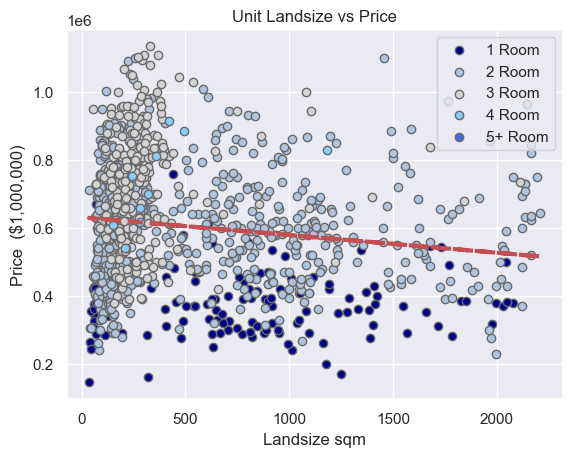

In [ ]:
# (u)nit Landsize vs Price
# Plot the linear model on top of scatter plot for Landsize vs Price
# create df to exclude outliers (h)ouse Landsize and (h)ouse price 
ul_mel_sales_df = v4_mel_sales_df.loc[(v4_mel_sales_df["Landsize"]>30)&(v4_mel_sales_df["Landsize"]<ul_upper_bound)&(v4_mel_sales_df["Price"]<up_upper_bound)]
ul_Landsize = ul_mel_sales_df.loc[(ul_mel_sales_df["Type"]=="Unit"),"Landsize"] 
ul_price = ul_mel_sales_df.loc[(ul_mel_sales_df["Type"]=="Unit"),"Price"]

#-- colour data series by room number

ul_Landsize_1 = ul_mel_sales_df.loc[(ul_mel_sales_df["Type"]=="Unit")&(ul_mel_sales_df["Rooms"]==1),"Landsize"] 
ul_price_1 = ul_mel_sales_df.loc[(ul_mel_sales_df["Type"]=="Unit")&(ul_mel_sales_df["Rooms"]==1),"Price"]

ul_Landsize_2 = ul_mel_sales_df.loc[(ul_mel_sales_df["Type"]=="Unit")&(ul_mel_sales_df["Rooms"]==2),"Landsize"] 
ul_price_2 = ul_mel_sales_df.loc[(ul_mel_sales_df["Type"]=="Unit")&(ul_mel_sales_df["Rooms"]==2),"Price"]

ul_Landsize_3 = ul_mel_sales_df.loc[(ul_mel_sales_df["Type"]=="Unit")&(ul_mel_sales_df["Rooms"]==3),"Landsize"] 
ul_price_3 = ul_mel_sales_df.loc[(ul_mel_sales_df["Type"]=="Unit")&(ul_mel_sales_df["Rooms"]==3),"Price"]

ul_Landsize_4 = ul_mel_sales_df.loc[(ul_mel_sales_df["Type"]=="Unit")&(ul_mel_sales_df["Rooms"]==4),"Landsize"] 
ul_price_4 = ul_mel_sales_df.loc[(ul_mel_sales_df["Type"]=="Unit")&(ul_mel_sales_df["Rooms"]==4),"Price"]

ul_Landsize_5a = ul_mel_sales_df.loc[(ul_mel_sales_df["Type"]=="Unit")&(ul_mel_sales_df["Rooms"]>=5),"Landsize"] 
ul_price_5a = ul_mel_sales_df.loc[(ul_mel_sales_df["Type"]=="Unit")&(ul_mel_sales_df["Rooms"]>=5),"Price"]

#groups = v4_mel_sales_df.groupby("Type")

# Perform a linear regression on Landsize vs Price
# Create equation of line to calculate predicted number
(ul_slope, ul_int, ul_rvalue, ul_pvalue, ul_stderr) = stats.linregress(ul_Landsize, ul_price)
ul_fit = ul_Landsize * ul_slope +ul_int
ul_line_eq = "y = " + str(round(ul_slope)) + "x + " + str(round(ul_int))

#plt.scatter(ul_Landsize,ul_price, label = ul_colour)

plt.scatter(ul_Landsize_1,ul_price_1, color = 'darkblue',edgecolor='dimgrey', label = '1 Room')
plt.scatter(ul_Landsize_2,ul_price_2, color = 'lightsteelblue' ,edgecolor='dimgrey', label = '2 Room')
plt.scatter(ul_Landsize_3,ul_price_3, color = 'lightgrey' ,edgecolor='dimgrey', label = '3 Room')
plt.scatter(ul_Landsize_4,ul_price_4, color = 'lightskyblue' ,edgecolor='dimgrey', label = '4 Room')
plt.scatter(ul_Landsize_5a,ul_price_5a, color = 'royalblue' ,edgecolor='dimgrey', label = '5+ Room')
plt.plot(ul_Landsize,ul_fit,"r--", linewidth=3)
plt.legend(loc='upper right')

plt.title('Unit Landsize vs Price')
plt.xlabel('Landsize sqm')
plt.ylabel('Price  ($1,000,000)')
ul_rsquare= round((ul_rvalue**2),4)

plt.annotate(ul_line_eq,(5.8,0.8),fontsize=10,color="red")
print(f"The r-squared value is:{ul_rsquare}")
print(f"{ul_line_eq}")
plt.show()

#Save the figure 
#plt.tight_layot()
#plt.savefig("Output Data/Graph Images/Unit_DistanceVsPrice")
#plt.show()





In [ ]:
#-------------------------Building Area Scatter & Regression

The r-squared value is:0.1826
y = 3810x + 550647


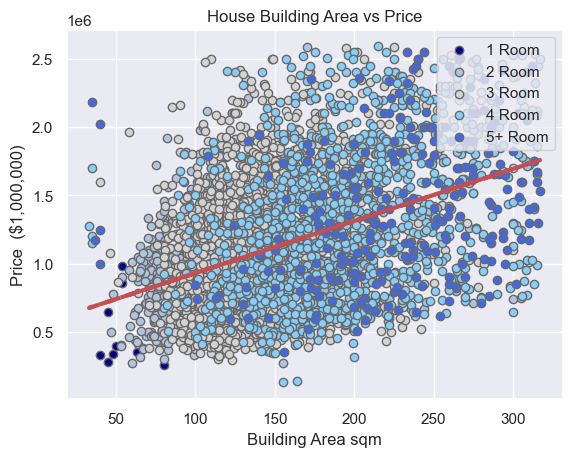

In [ ]:
#-------------------------------- BuildingArea
# (t)ownouse BuildingArea vs Price
# Plot the linear model on top of scatter plot for BuildingArea vs Price
# create df to exclude outliers (h)ouse BuildingArea and (h)ouse price 
ha_mel_sales_df = v4_mel_sales_df.loc[(v4_mel_sales_df["BuildingArea"]>30)&(v4_mel_sales_df["BuildingArea"]<ha_upper_bound)&(v4_mel_sales_df["Price"]<hp_upper_bound)]
ha_BuildingArea = ha_mel_sales_df.loc[(ha_mel_sales_df["Type"]=="House"),"BuildingArea"] 
ha_price = ha_mel_sales_df.loc[(ha_mel_sales_df["Type"]=="House"),"Price"]

#-- colour data series by room number

ha_BuildingArea_1 = ha_mel_sales_df.loc[(ha_mel_sales_df["Type"]=="House")&(ha_mel_sales_df["Rooms"]==1),"BuildingArea"] 
ha_price_1 = ha_mel_sales_df.loc[(ha_mel_sales_df["Type"]=="House")&(ha_mel_sales_df["Rooms"]==1),"Price"]

ha_BuildingArea_2 = ha_mel_sales_df.loc[(ha_mel_sales_df["Type"]=="House")&(ha_mel_sales_df["Rooms"]==2),"BuildingArea"] 
ha_price_2 = ha_mel_sales_df.loc[(ha_mel_sales_df["Type"]=="House")&(ha_mel_sales_df["Rooms"]==2),"Price"]

ha_BuildingArea_3 = ha_mel_sales_df.loc[(ha_mel_sales_df["Type"]=="House")&(ha_mel_sales_df["Rooms"]==3),"BuildingArea"] 
ha_price_3 = ha_mel_sales_df.loc[(ha_mel_sales_df["Type"]=="House")&(ha_mel_sales_df["Rooms"]==3),"Price"]

ha_BuildingArea_4 = ha_mel_sales_df.loc[(ha_mel_sales_df["Type"]=="House")&(ha_mel_sales_df["Rooms"]==4),"BuildingArea"] 
ha_price_4 = ha_mel_sales_df.loc[(ha_mel_sales_df["Type"]=="House")&(ha_mel_sales_df["Rooms"]==4),"Price"]

ha_BuildingArea_5a = ha_mel_sales_df.loc[(ha_mel_sales_df["Type"]=="House")&(ha_mel_sales_df["Rooms"]>=5),"BuildingArea"] 
ha_price_5a = ha_mel_sales_df.loc[(ha_mel_sales_df["Type"]=="House")&(ha_mel_sales_df["Rooms"]>=5),"Price"]

#groups = v4_mel_sales_df.groupby("Type")

# Perform a linear regression on BuildingArea vs Price
# Create equation of line to calculate predicted number
(ha_slope, ha_int, ha_rvalue, ha_pvalue, ha_stderr) = stats.linregress(ha_BuildingArea, ha_price)
ha_fit = ha_BuildingArea * ha_slope +ha_int
ha_line_eq = "y = " + str(round(ha_slope)) + "x + " + str(round(ha_int))

#plt.scatter(ha_BuildingArea,ha_price, label = ha_colour)

plt.scatter(ha_BuildingArea_1,ha_price_1, color = 'darkblue',edgecolor='dimgrey', label = '1 Room')
plt.scatter(ha_BuildingArea_2,ha_price_2, color = 'lightsteelblue' ,edgecolor='dimgrey', label = '2 Room')
plt.scatter(ha_BuildingArea_3,ha_price_3, color = 'lightgrey' ,edgecolor='dimgrey', label = '3 Room')
plt.scatter(ha_BuildingArea_4,ha_price_4, color = 'lightskyblue' ,edgecolor='dimgrey', label = '4 Room')
plt.scatter(ha_BuildingArea_5a,ha_price_5a, color = 'royalblue' ,edgecolor='dimgrey', label = '5+ Room')
plt.plot(ha_BuildingArea,ha_fit,"r--", linewidth=3)
plt.legend(loc='upper right')

plt.title('House Building Area vs Price')
plt.xlabel('Building Area sqm')
plt.ylabel('Price  ($1,000,000)')
ha_rsquare= round((ha_rvalue**2),4)

plt.annotate(ha_line_eq,(5.8,0.8),fontsize=10,color="red")
print(f"The r-squared value is:{ha_rsquare}")
print(f"{ha_line_eq}")
plt.show()

#Save the figure 
#plt.tight_layot()
#plt.savefig("Output Data/Graph Images/HouseBuildingAreaVsPrice")
#plt.show()




The r-squared value is:0.3667
y = 4803x + 211309


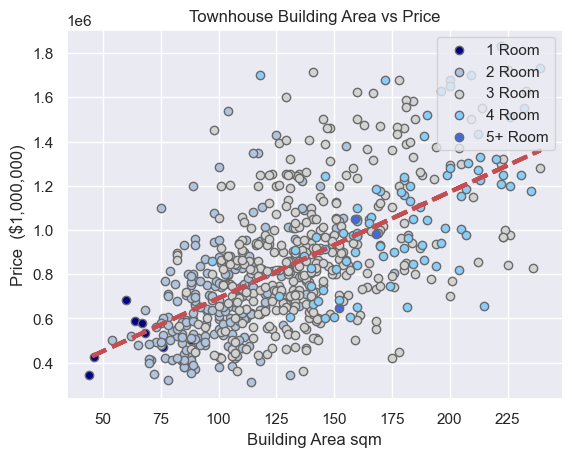

In [ ]:
#-------------------------------- BuildingArea
# (t)ownouse BuildingArea vs Price
# Plot the linear model on top of scatter plot for BuildingArea vs Price
# create df to exclude outliers (h)ouse BuildingArea and (h)ouse price 
ta_mel_sales_df = v4_mel_sales_df.loc[(v4_mel_sales_df["BuildingArea"]>30)&(v4_mel_sales_df["BuildingArea"]<ta_upper_bound)&(v4_mel_sales_df["Price"]<tp_upper_bound)]
ta_BuildingArea = ta_mel_sales_df.loc[(ta_mel_sales_df["Type"]=="Townhouse"),"BuildingArea"] 
ta_price = ta_mel_sales_df.loc[(ta_mel_sales_df["Type"]=="Townhouse"),"Price"]

#-- colour data series by room number

ta_BuildingArea_1 = ta_mel_sales_df.loc[(ta_mel_sales_df["Type"]=="Townhouse")&(ta_mel_sales_df["Rooms"]==1),"BuildingArea"] 
ta_price_1 = ta_mel_sales_df.loc[(ta_mel_sales_df["Type"]=="Townhouse")&(ta_mel_sales_df["Rooms"]==1),"Price"]

ta_BuildingArea_2 = ta_mel_sales_df.loc[(ta_mel_sales_df["Type"]=="Townhouse")&(ta_mel_sales_df["Rooms"]==2),"BuildingArea"] 
ta_price_2 = ta_mel_sales_df.loc[(ta_mel_sales_df["Type"]=="Townhouse")&(ta_mel_sales_df["Rooms"]==2),"Price"]

ta_BuildingArea_3 = ta_mel_sales_df.loc[(ta_mel_sales_df["Type"]=="Townhouse")&(ta_mel_sales_df["Rooms"]==3),"BuildingArea"] 
ta_price_3 = ta_mel_sales_df.loc[(ta_mel_sales_df["Type"]=="Townhouse")&(ta_mel_sales_df["Rooms"]==3),"Price"]

ta_BuildingArea_4 = ta_mel_sales_df.loc[(ta_mel_sales_df["Type"]=="Townhouse")&(ta_mel_sales_df["Rooms"]==4),"BuildingArea"] 
ta_price_4 = ta_mel_sales_df.loc[(ta_mel_sales_df["Type"]=="Townhouse")&(ta_mel_sales_df["Rooms"]==4),"Price"]

ta_BuildingArea_5a = ta_mel_sales_df.loc[(ta_mel_sales_df["Type"]=="Townhouse")&(ta_mel_sales_df["Rooms"]>=5),"BuildingArea"] 
ta_price_5a = ta_mel_sales_df.loc[(ta_mel_sales_df["Type"]=="Townhouse")&(ta_mel_sales_df["Rooms"]>=5),"Price"]

#groups = v4_mel_sales_df.groupby("Type")

# Perform a linear regression on BuildingArea vs Price
# Create equation of line to calculate predicted number
(ta_slope, ta_int, ta_rvalue, ta_pvalue, ta_stderr) = stats.linregress(ta_BuildingArea, ta_price)
ta_fit = ta_BuildingArea * ta_slope +ta_int
ta_line_eq = "y = " + str(round(ta_slope)) + "x + " + str(round(ta_int))

#plt.scatter(ta_BuildingArea,ta_price, label = ta_colour)


plt.scatter(ta_BuildingArea_1,ta_price_1, color = 'darkblue',edgecolor='dimgrey', label = '1 Room')
plt.scatter(ta_BuildingArea_2,ta_price_2, color = 'lightsteelblue' ,edgecolor='dimgrey', label = '2 Room')
plt.scatter(ta_BuildingArea_3,ta_price_3, color = 'lightgrey' ,edgecolor='dimgrey', label = '3 Room')
plt.scatter(ta_BuildingArea_4,ta_price_4, color = 'lightskyblue' ,edgecolor='dimgrey', label = '4 Room')
plt.scatter(ta_BuildingArea_5a,ta_price_5a, color = 'royalblue' ,edgecolor='dimgrey', label = '5+ Room')
plt.plot(ta_BuildingArea,ta_fit,"r--", linewidth=3)
plt.legend(loc='upper right')


plt.title('Townhouse Building Area vs Price')
plt.xlabel('Building Area sqm')
plt.ylabel('Price  ($1,000,000)')
ta_rsquare= round((ta_rvalue**2),4)

plt.annotate(ta_line_eq,(5.8,0.8),fontsize=10,color="red")
print(f"The r-squared value is:{ta_rsquare}")
print(f"{ta_line_eq}")
plt.show()

#Save the figure 
#plt.tight_layot()
#plt.savefig("Output Data/Graph Images/TH_BuildingAreaVsPrice")
#plt.show()




The r-squared value is:0.4296
y = 5129x + 167527


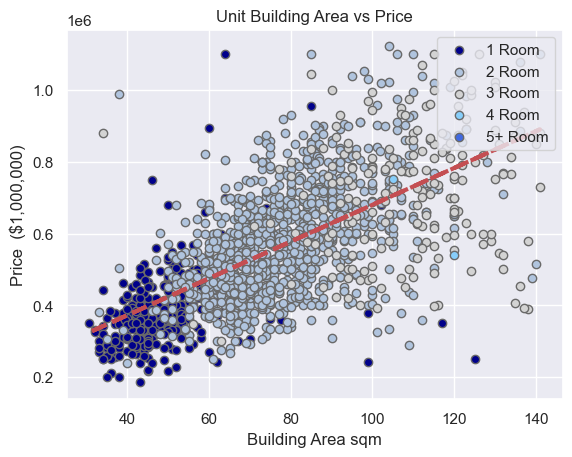

In [ ]:
#-------------------------------- BuildingArea
# (t)ownouse BuildingArea vs Price
# Plot the linear model on top of scatter plot for BuildingArea vs Price
# create df to exclude outliers (h)ouse BuildingArea and (h)ouse price 
ua_mel_sales_df = v4_mel_sales_df.loc[(v4_mel_sales_df["BuildingArea"]>30)&(v4_mel_sales_df["BuildingArea"]<ua_upper_bound)&(v4_mel_sales_df["Price"]<up_upper_bound)]
ua_BuildingArea = ua_mel_sales_df.loc[(ua_mel_sales_df["Type"]=="Unit"),"BuildingArea"] 
ua_price = ua_mel_sales_df.loc[(ua_mel_sales_df["Type"]=="Unit"),"Price"]

#-- colour data series by room number

ua_BuildingArea_1 = ua_mel_sales_df.loc[(ua_mel_sales_df["Type"]=="Unit")&(ua_mel_sales_df["Rooms"]==1),"BuildingArea"] 
ua_price_1 = ua_mel_sales_df.loc[(ua_mel_sales_df["Type"]=="Unit")&(ua_mel_sales_df["Rooms"]==1),"Price"]

ua_BuildingArea_2 = ua_mel_sales_df.loc[(ua_mel_sales_df["Type"]=="Unit")&(ua_mel_sales_df["Rooms"]==2),"BuildingArea"] 
ua_price_2 = ua_mel_sales_df.loc[(ua_mel_sales_df["Type"]=="Unit")&(ua_mel_sales_df["Rooms"]==2),"Price"]

ua_BuildingArea_3 = ua_mel_sales_df.loc[(ua_mel_sales_df["Type"]=="Unit")&(ua_mel_sales_df["Rooms"]==3),"BuildingArea"] 
ua_price_3 = ua_mel_sales_df.loc[(ua_mel_sales_df["Type"]=="Unit")&(ua_mel_sales_df["Rooms"]==3),"Price"]

ua_BuildingArea_4 = ua_mel_sales_df.loc[(ua_mel_sales_df["Type"]=="Unit")&(ua_mel_sales_df["Rooms"]==4),"BuildingArea"] 
ua_price_4 = ua_mel_sales_df.loc[(ua_mel_sales_df["Type"]=="Unit")&(ua_mel_sales_df["Rooms"]==4),"Price"]

ua_BuildingArea_5a = ua_mel_sales_df.loc[(ua_mel_sales_df["Type"]=="Unit")&(ua_mel_sales_df["Rooms"]>=5),"BuildingArea"] 
ua_price_5a = ua_mel_sales_df.loc[(ua_mel_sales_df["Type"]=="Unit")&(ua_mel_sales_df["Rooms"]>=5),"Price"]

#groups = v4_mel_sales_df.groupby("Type")

# Perform a linear regression on BuildingArea vs Price
# Create equation of line to calculate predicted number
(ua_slope, ua_int, ua_rvalue, ua_pvalue, ua_stderr) = stats.linregress(ua_BuildingArea, ua_price)
ua_fit = ua_BuildingArea * ua_slope +ua_int
ua_line_eq = "y = " + str(round(ua_slope)) + "x + " + str(round(ua_int))

#plt.scatter(ua_BuildingArea,ua_price, label = ua_colour)

plt.scatter(ua_BuildingArea_1,ua_price_1, color = 'darkblue',edgecolor='dimgrey', label = '1 Room')
plt.scatter(ua_BuildingArea_2,ua_price_2, color = 'lightsteelblue' ,edgecolor='dimgrey', label = '2 Room')
plt.scatter(ua_BuildingArea_3,ua_price_3, color = 'lightgrey' ,edgecolor='dimgrey', label = '3 Room')
plt.scatter(ua_BuildingArea_4,ua_price_4, color = 'lightskyblue' ,edgecolor='dimgrey', label = '4 Room')
plt.scatter(ua_BuildingArea_5a,ua_price_5a, color = 'royalblue' ,edgecolor='dimgrey', label = '5+ Room')
plt.plot(ua_BuildingArea,ua_fit,"r--", linewidth=3)
plt.legend(loc='upper right')


plt.title('Unit Building Area vs Price')
plt.xlabel('Building Area sqm')
plt.ylabel('Price  ($1,000,000)')
ua_rsquare= round((ua_rvalue**2),4)

plt.annotate(ua_line_eq,(5.8,0.8),fontsize=10,color="red")
print(f"The r-squared value is:{ua_rsquare}")
print(f"{ua_line_eq}")
plt.show()

#Save the figure 
#plt.tight_layot()
#plt.savefig("Output Data/Graph Images/Unit_BuildingAreaVsPrice")
#plt.show()







<font size ="7"> Question 4: Age is Just a Number: Analysing the Effect of Building Age on Property Prices in Melbourne, seeing if there is a correlation to price across all suburbs.

<font size ="5"> Add Minh's Code here

<font size ="7"> Question 5:Unique Factors: An Analysis of the impact of proximity to Public Transport, Shopping, Healthcare, Cultural Attractions and Open Parklands has on House Prices in a 10km to 20km radius of Melbourne.

In [ ]:
# Start Work for API Call Section
api_call_add_range_df = property_database[["Suburb", "Address", "Price", "Lattitude", "Longtitude", "Type", "Distance","CouncilArea"]]

# Set distance as int64 value and then filter for less than 20kms bu greater than 10km
api_call_add_range_df["Distance"] = api_call_add_range_df["Distance"].astype("float")
api_call_add_range_df = api_call_add_range_df.loc[(api_call_add_range_df["Distance"] > 10) & (api_call_add_range_df["Distance"] < 20)]

# Set type as h value
api_call_add_range_df = api_call_add_range_df.loc[(api_call_add_range_df["Type"] == "House")]

# Drop any NA values in the dataframe
api_call_add_range_df = api_call_add_range_df.dropna()

# Show dataframe
api_call_add_range_df

/var/folders/c6/f4lv068572x0t6lvnvn2yjyc0000gn/T/ipykernel_62560/1457470291.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  api_call_add_range_df["Distance"] = api_call_add_range_df["Distance"].astype("float")


,Suburb,Address,Price,Lattitude,Longtitude,Type,Distance,CouncilArea
53,Airport West,50 Bedford St,730000,-37.72030,144.87550,House,13.5,Moonee Valley
54,Airport West,50 Bedford St,770000,-37.72030,144.87550,House,13.5,Moonee Valley
55,Airport West,23 Hart St,603000,-37.72940,144.88800,House,13.5,Moonee Valley
57,Airport West,1/37 Hillside Gr,600000,-37.72730,144.87440,House,13.5,Moonee Valley
64,Airport West,54 Marshall Rd,720000,-37.71730,144.88720,House,13.5,Moonee Valley
...,...,...,...,...,...,...,...,...
15381,Werribee,46 Coventry Dr,482500,-37.89337,144.64003,House,14.7,Wyndham
15383,Werribee,40 Tarneit Rd,597000,-37.89402,144.66276,House,14.7,Wyndham
15385,Westmeadows,43 Bamford Av,821000,-37.67841,144.87924,House,16.5,Hume
15386,Westmeadows,4 Pershore Ct,635000,-37.68026,144.88468,House,16.5,Hume


In [ ]:
# Search for proximity to public_transport.train
# Set parameters to search for nearby locations
radius = 2000
categories = ["public_transport.train"]

# Create a dictionary to store the results
results = {}

# Iterate through each category
for category in categories:
    params = {
        "categories": category,
        "apiKey": geoapify_key,
        "limit": 20
    }

    # Print a message to follow up the location search
    print(f"Starting {category} search")

    # Create counters
    record_count = 1
    set_count = 1
 
    # Iterate through the api_call_df DataFrame
    for index, row in api_call_add_range_df.iterrows():

        # # Get the address's name
        address = row["Address"]
        
        # Get latitude, longitude from the DataFrame
        latitude = row["Lattitude"]
        longitude = row["Longtitude"]
        
        # Add filter and bias parameters with the current address's latitude and longitude to the params dictionary
        params["filter"] = f"circle:{longitude},{latitude},{radius}"
        params["bias"] = f"proximity:{longitude},{latitude}"
        
        # Set base URL
        base_url = "https://api.geoapify.com/v2/places?"
       
        # Make and API request using the params dictionary
        name_address = requests.get(base_url, params=params)
        
        # Convert the API response to JSON format
        name_address = name_address.json()
    
        # Check if a location is found and store the result in the results dictionary
        if name_address["features"]:
            results.setdefault(category, {})[index] = "Yes"
        else:
            results.setdefault(category, {})[index] = "Not found"
            
        # Log the search results
        print(f"{api_call_add_range_df.loc[index, 'Address']} - nearest {category}: {results[category][index]}")

    # Append the results for this category to a new column in the api_call_df DataFrame
    api_call_add_range_df[f"{category} Name"] = [results[category][index] for index in api_call_add_range_df.index]

# Display the updated DataFrame
print(api_call_add_range_df)

# Export the City_Data into a csv
api_call_add_range_df.to_csv("Output Data/api_call_transport_new.csv")

In [ ]:
# Search for proximity to commercial.shopping_mall
# Read saved data
api_call_add_range_df = pd.read_csv("Output Data/api_call_transport_new.csv")

# Set parameters to search for nearby locations
radius = 2000
categories = ["commercial.shopping_mall"]

# Create a dictionary to store the results
results = {}

# Iterate through each category
for category in categories:
    params = {
        "categories": category,
        "apiKey": geoapify_key,
        "limit": 20
    }

    # Print a message to follow up the location search
    print(f"Starting {category} search")

    # Create counters
    record_count = 1
    set_count = 1
 
    # Iterate through the api_call_df DataFrame
    for index, row in api_call_add_range_df.iterrows():

        # # Get the address's name
        address = row["Address"]
        
        # Get latitude, longitude from the DataFrame
        latitude = row["Lattitude"]
        longitude = row["Longtitude"]
        
        # Add filter and bias parameters with the current address's latitude and longitude to the params dictionary
        params["filter"] = f"circle:{longitude},{latitude},{radius}"
        params["bias"] = f"proximity:{longitude},{latitude}"
        
        # Set base URL
        base_url = "https://api.geoapify.com/v2/places?"
       
        # Make and API request using the params dictionary
        name_address = requests.get(base_url, params=params)
        
        # Convert the API response to JSON format
        name_address = name_address.json()
    
        # Check if a location is found and store the result in the results dictionary
        if name_address["features"]:
            results.setdefault(category, {})[index] = "Yes"
        else:
            results.setdefault(category, {})[index] = "Not found"
            
        # Log the search results
        print(f"{api_call_add_range_df.loc[index, 'Address']} - nearest {category}: {results[category][index]}")

    # Append the results for this category to a new column in the api_call_df DataFrame
    api_call_add_range_df[f"{category} Name"] = [results[category][index] for index in api_call_add_range_df.index]

# Display the updated DataFrame
print(api_call_add_range_df)

# Export the City_Data into a csv
api_call_add_range_df.to_csv("Output Data/api_call_shopping_new.csv")

In [ ]:
# Search for proximity to healthcare
# Read saved data
api_call_add_range_df = pd.read_csv("Output Data/api_call_shopping_new.csv")

# Set parameters to search for nearby locations
radius = 2000
categories = ["healthcare"]

# Create a dictionary to store the results
results = {}

# Iterate through each category
for category in categories:
    params = {
        "categories": category,
        "apiKey": geoapify_key,
        "limit": 20
    }

    # Print a message to follow up the location search
    print(f"Starting {category} search")

    # Create counters
    record_count = 1
    set_count = 1
 
    # Iterate through the api_call_df DataFrame
    for index, row in api_call_add_range_df.iterrows():

        # # Get the address's name
        address = row["Address"]
        
        # Get latitude, longitude from the DataFrame
        latitude = row["Lattitude"]
        longitude = row["Longtitude"]
        
        # Add filter and bias parameters with the current address's latitude and longitude to the params dictionary
        params["filter"] = f"circle:{longitude},{latitude},{radius}"
        params["bias"] = f"proximity:{longitude},{latitude}"
        
        # Set base URL
        base_url = "https://api.geoapify.com/v2/places?"
       
        # Make and API request using the params dictionary
        name_address = requests.get(base_url, params=params)
        
        # Convert the API response to JSON format
        name_address = name_address.json()
    
        # Check if a location is found and store the result in the results dictionary
        if name_address["features"]:
            results.setdefault(category, {})[index] = "Yes"
        else:
            results.setdefault(category, {})[index] = "Not found"
            
        # Log the search results
        print(f"{api_call_add_range_df.loc[index, 'Address']} - nearest {category}: {results[category][index]}")

    # Append the results for this category to a new column in the api_call_df DataFrame
    api_call_add_range_df[f"{category} Name"] = [results[category][index] for index in api_call_add_range_df.index]

# Display the updated DataFrame
print(api_call_add_range_df)

# Export the City_Data into a csv
api_call_add_range_df.to_csv("Output Data/api_call_healthcare_new.csv")

In [ ]:
# Search for proximity to tourism.attraction
# Read saved data
api_call_add_range_df = pd.read_csv("Output Data/api_call_healthcare_new.csv")
# Drop unwanted columns
api_call_add_range_df = api_call_add_range_df.drop(columns=["Unnamed: 0", "Unnamed: 0.1", "Unnamed: 0.2"])

# Show the first few rows of the DataFrame
api_call_add_range_df.head()

# Set parameters to search for nearby locations
radius = 2000
categories = ["tourism.attraction"]

# Create a dictionary to store the results
results = {}

# Iterate through each category
for category in categories:
    params = {
        "categories": category,
        "apiKey": geoapify_key,
        "limit": 20
    }

    # Print a message to follow up the location search
    print(f"Starting {category} search")

    # Create counters
    record_count = 1
    set_count = 1
 
    # Iterate through the api_call_df DataFrame
    for index, row in api_call_add_range_df.iterrows():

        # Get the address's name
        address = row["Address"]
        
        # Get latitude, longitude from the DataFrame
        latitude = row["Lattitude"]
        longitude = row["Longtitude"]
        
        # Add filter and bias parameters with the current address's latitude and longitude to the params dictionary
        params["filter"] = f"circle:{longitude},{latitude},{radius}"
        params["bias"] = f"proximity:{longitude},{latitude}"
        
        # Set base URL
        base_url = "https://api.geoapify.com/v2/places?"
       
        # Make and API request using the params dictionary
        name_address = requests.get(base_url, params=params)
        
        # Convert the API response to JSON format
        name_address = name_address.json()
    
        # Check if a location is found and store the result in the results dictionary
        if name_address["features"]:
            results.setdefault(category, {})[index] = "Yes"
        else:
            results.setdefault(category, {})[index] = "Not found"
            
        # Log the search results
        print(f"{api_call_add_range_df.loc[index, 'Address']} - nearest {category}: {results[category][index]}")

    # Append the results for this category to a new column in the api_call_df DataFrame
    api_call_add_range_df[f"{category} Name"] = [results[category][index] for index in api_call_add_range_df.index]

# Display the updated DataFrame
print(api_call_add_range_df)

# Export the City_Data into a csv
api_call_add_range_df.to_csv("Output Data/api_call_tourism_attraction_new.csv")

In [ ]:
# Search for proximity to leisure.park.nature_reserve
# Read saved data
api_call_add_range_df = pd.read_csv("Output Data/api_call_tourism_attraction_new.csv")

# Drop unwanted columns
api_call_add_range_df = api_call_add_range_df.drop(columns=["Unnamed: 0"])
api_call_add_range_df.head()

# Show the first few rows of the DataFrame
api_call_add_range_df.head()

# Set parameters to search for nearby locations
radius = 2000
categories = ["leisure.park.nature_reserve"]

# Create a dictionary to store the results
results = {}

# Iterate through each category
for category in categories:
    params = {
        "categories": category,
        "apiKey": geoapify_key,
        "limit": 20
    }

    # Print a message to follow up the location search
    print(f"Starting {category} search")

    # Create counters
    record_count = 1
    set_count = 1
 
    # Iterate through the api_call_df DataFrame
    for index, row in api_call_add_range_df.iterrows():

        # Get the address's name
        address = row["Address"]
        
        # Get latitude, longitude from the DataFrame
        latitude = row["Lattitude"]
        longitude = row["Longtitude"]
        
        # Add filter and bias parameters with the current address's latitude and longitude to the params dictionary
        params["filter"] = f"circle:{longitude},{latitude},{radius}"
        params["bias"] = f"proximity:{longitude},{latitude}"
        
        # Set base URL
        base_url = "https://api.geoapify.com/v2/places?"
       
        # Make and API request using the params dictionary
        name_address = requests.get(base_url, params=params)
        
        # Convert the API response to JSON format
        name_address = name_address.json()
    
        # Check if a location is found and store the result in the results dictionary
        if name_address["features"]:
            results.setdefault(category, {})[index] = "Yes"
        else:
            results.setdefault(category, {})[index] = "Not found"
            
        # Log the search results
        print(f"{api_call_add_range_df.loc[index, 'Address']} - nearest {category}: {results[category][index]}")

    # Append the results for this category to a new column in the api_call_df DataFrame
    api_call_add_range_df[f"{category} Name"] = [results[category][index] for index in api_call_add_range_df.index]

# Display the updated DataFrame
print(api_call_add_range_df)

# Export the City_Data into a csv
api_call_add_range_df.to_csv("Output Data/api_call_park_new.csv")

In [ ]:
# Read saved data
unique_indicators_add_range_df = pd.read_csv("Output Data/api_call_park_new.csv")

# Drop unwanted columns
unique_indicators_add_range_df = unique_indicators_add_range_df.drop(columns=["Unnamed: 0"])
unique_indicators_add_range_df.head()

# replace 'Yes' with 1
unique_indicators_add_range_df['public_transport.train Name'] = unique_indicators_add_range_df['public_transport.train Name'].replace({'Yes': 1})
unique_indicators_add_range_df['public_transport.train Name'] = unique_indicators_add_range_df['public_transport.train Name'].replace({"Not found": 0})

unique_indicators_add_range_df['commercial.shopping_mall Name'] = unique_indicators_add_range_df['commercial.shopping_mall Name'].replace({'Yes': 1})
unique_indicators_add_range_df['commercial.shopping_mall Name'] = unique_indicators_add_range_df['commercial.shopping_mall Name'].replace({"Not found": 0})

unique_indicators_add_range_df['healthcare Name'] = unique_indicators_add_range_df['healthcare Name'].replace({'Yes': 1})
unique_indicators_add_range_df['healthcare Name'] = unique_indicators_add_range_df['healthcare Name'].replace({"Not found": 0})

unique_indicators_add_range_df['tourism.attraction Name'] = unique_indicators_add_range_df['tourism.attraction Name'].replace({'Yes': 1})
unique_indicators_add_range_df['tourism.attraction Name'] = unique_indicators_add_range_df['tourism.attraction Name'].replace({"Not found": 0})

unique_indicators_add_range_df['leisure.park.nature_reserve Name'] = unique_indicators_add_range_df['leisure.park.nature_reserve Name'].replace({'Yes': 1})
unique_indicators_add_range_df['leisure.park.nature_reserve Name'] = unique_indicators_add_range_df['leisure.park.nature_reserve Name'].replace({"Not found": 0})

#Rename Columns
unique_indicators_add_range_df = unique_indicators_add_range_df.rename(columns={"public_transport.train Name": "Public Transport", "commercial.shopping_mall Name" : "Shopping Mall", "healthcare Name":"Healthcare", "tourism.attraction Name" : "Tourism Attraction", "leisure.park.nature_reserve Name" :"Park"})

#Calculate the Number of Stars
unique_indicators_add_range_df["Star Rating"] = unique_indicators_add_range_df[["Public Transport", "Shopping Mall", "Healthcare", "Tourism Attraction", "Park"]].sum(axis=1)
unique_indicators_add_range_df.head()

,Suburb,Address,Price,Lattitude,Longtitude,Type,Distance,CouncilArea,Public Transport,Shopping Mall,Healthcare,Tourism Attraction,Park,Star Rating
0,Airport West,50 Bedford St,730000,-37.7203,144.8755,h,13.5,Moonee Valley,0,1,1,1,1,4
1,Airport West,50 Bedford St,770000,-37.7203,144.8755,h,13.5,Moonee Valley,0,1,1,1,1,4
2,Airport West,23 Hart St,603000,-37.7294,144.8880,h,13.5,Moonee Valley,0,1,1,1,1,4
3,Airport West,1/37 Hillside Gr,600000,-37.7273,144.8744,h,13.5,Moonee Valley,0,1,1,1,1,4
4,Airport West,54 Marshall Rd,720000,-37.7173,144.8872,h,13.5,Moonee Valley,0,1,1,0,1,3


In [ ]:
# Groupby each factor Public Transport", "Shopping Mall", "Healthcare", "Tourism Attraction", "Park"
mean_price_by_publictransport2 = unique_indicators_add_range_df.groupby("Public Transport")["Price"].mean()
print(mean_price_by_publictransport2)

mean_price_by_shoppingmall2 = unique_indicators_add_range_df.groupby("Shopping Mall")["Price"].mean()
print(mean_price_by_shoppingmall2)

mean_price_by_healthcare2 = unique_indicators_add_range_df.groupby("Healthcare")["Price"].mean()
print(mean_price_by_healthcare2)

mean_price_by_attraction2 = unique_indicators_add_range_df.groupby("Tourism Attraction")["Price"].mean()
print(mean_price_by_attraction2)

mean_price_by_park2 = unique_indicators_add_range_df.groupby("Park")["Price"].mean()
print(mean_price_by_park2)

# Create a DataFrame with the mean prices for each factor
star_rating_df2 = pd.DataFrame({
    "Public Transport": mean_price_by_publictransport2,
    "Shopping Mall": mean_price_by_shoppingmall2,
    "Healthcare": mean_price_by_healthcare2,
    "Tourism Attraction": mean_price_by_attraction2,
    "Park": mean_price_by_park2
})

# Print the DataFrame
star_rating_df2

# Transpose the DataFrame
star_rating_df2_transpose = star_rating_df2.transpose()

# Print the transposed DataFrame
print(star_rating_df2_transpose)


Public Transport
0    1.003434e+06
1    1.143582e+06
Name: Price, dtype: float64
Shopping Mall
0    1.203274e+06
1    1.071384e+06
Name: Price, dtype: float64
Healthcare
0    6.690603e+05
1    1.112341e+06
Name: Price, dtype: float64
Tourism Attraction
0    1.011395e+06
1    1.139717e+06
Name: Price, dtype: float64
Park
0    1.200186e+06
1    9.689882e+05
Name: Price, dtype: float64
                               0             1
Public Transport    1.003434e+06  1.143582e+06
Shopping Mall       1.203274e+06  1.071384e+06
Healthcare          6.690603e+05  1.112341e+06
Tourism Attraction  1.011395e+06  1.139717e+06
Park                1.200186e+06  9.689882e+05


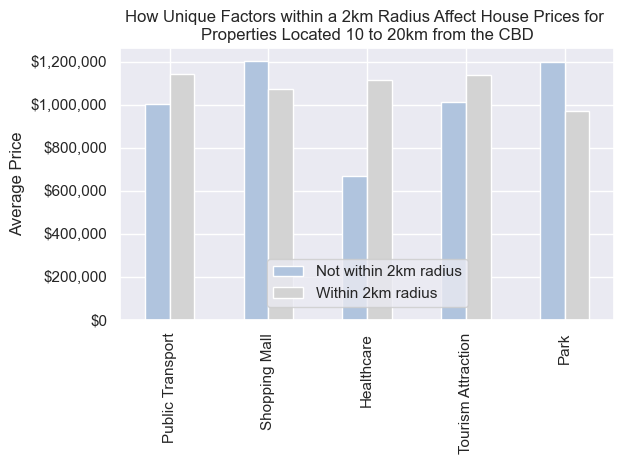

In [ ]:
star_rating_df2_transpose = star_rating_df2_transpose.astype("float")
ax = star_rating_df2_transpose.plot(kind="bar", color=color)

# Set the x-axis tick labels to the index of the dataframe
ax.set_xticklabels(star_rating_df2_transpose.index)

ax.set_ylabel("Average Price")
ax.set_title("How Unique Factors within a 2km Radius Affect House Prices for \nProperties Located 10 to 20km from the CBD")  # add newline character

# Format the y-axis ticks to display values in dollars
fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax.yaxis.set_major_formatter(tick)

# Set the legend to the column names of the dataframe, with new labels
legend_labels = {0: "Not within 2km radius", 1: "Within 2km radius"}
ax.legend(star_rating_df2_transpose.columns.map(legend_labels), bbox_to_anchor=(0.5, 0.25), loc='upper center')

plt.xticks(rotation=90)

# Save the figure
plt.tight_layout()
plt.savefig("Output Data/Graph Images/AvgPricePerUniqueFactorWithin2kmRadius-10KM_to_20km_Data")

#Show the plot
plt.show()



In [ ]:
# Define the bins for the Star Rating
bins = [0, 1, 2, 3, 4, 5]

# Create a new column with the binned values
unique_indicators_add_range_df["Star Rating Bins"] = pd.cut(unique_indicators_add_range_df["Star Rating"], bins=bins, labels=["1 star", "2 stars", "3 stars", "4 stars", "5 stars"])

# Calculate the mean price for each star rating
mean_price_by_rating2 = unique_indicators_add_range_df.groupby("Star Rating Bins")["Price"].mean()

# Create a data frame from the mean_price_by_rating2 series
mean_price_by_rating_df2 = pd.DataFrame(mean_price_by_rating2)

# Reset the index
mean_price_by_rating_df2 = mean_price_by_rating_df2.reset_index()

# Rename the columns
mean_price_by_rating_df2 = mean_price_by_rating_df2.rename(columns={"Price": "Mean Price", "Star Rating Bins": "Star Rating"})

# Create a polar chart with the mean price by star rating
fig = go.Figure(data=go.Scatterpolar(
      r=mean_price_by_rating_df2['Mean Price'],
      theta=mean_price_by_rating_df2['Star Rating'],
      fill='toself',
      hovertemplate='Average Price: $%{r:,.0f}<br>Star Count: %{theta}',
))

fig.update_layout(
  polar=dict(
    radialaxis=dict(
      visible=True,
      tickprefix='$',
      tickformat=",",
    ),
  ),
  showlegend=False,
  title='Average Price by Star Rating',
)

fig.show()

fig.write_image("Output Data/Graph Images/MeanPricebyStarRating_10_to_20km_Dataset.png")

             Average Star Rating  Count of Properties
CouncilArea                                          
Banyule                 4.413043                  276
Bayside                 3.347267                  311
Boroondara              3.888889                   90
Brimbank                3.739474                  380
Darebin                 3.532468                  231


<Figure size 1000x600 with 0 Axes>

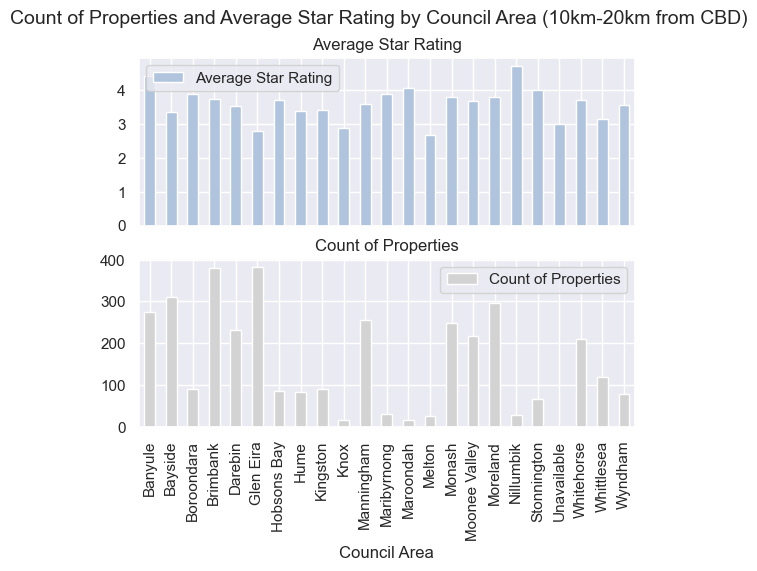

In [ ]:
#Get the council vs star rating mean
council_star = unique_indicators_add_range_df.groupby("CouncilArea")["Star Rating"].mean()
#Get the council vs address count
council_address = unique_indicators_add_range_df.groupby("CouncilArea")["Address"].count()

#create a dataframe
council_data = pd.concat([council_star, council_address], axis=1)
council_data.columns = ["Average Star Rating", "Count of Properties"]
print(council_data.head())

# Set the figure size
plt.figure(figsize=(10, 6))

# plot bar chart of council and the two metrics 
council_data.plot(kind="bar", rot=90, subplots=True, color = color)

# Set the plot title and axis labels
plt.suptitle("Count of Properties and Average Star Rating by Council Area (10km-20km from CBD)", fontsize=14)
plt.xlabel("Council Area")
plt.ylabel("")

# Save the figure
plt.savefig("Output Data/Graph Images/CouncilArea&AvgStarRating&CountOfProperties-10KM_to_20km_Data", bbox_inches="tight")

# Show the plot
plt.show()